<a href="https://colab.research.google.com/github/marianayarce1224/lab_biosenales/blob/main/PROYECTO2/Proyecto2_G3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p>

<h1><b>Proyecto 2: Análisis de señales ECG</b></h1>
<h4><b>Bioseñales y sistemas<br>Universidad de Antioquia, Facultad de Ingeniería - Bioingeniería<br>2024-2</b></h4><br>

<h4><b>Grupo:</b> 3</h4>
<h4><b>Integrantes:</b> Mariana Álvarez Yarce - Ana María Seguro Acevedo</h4>

##<b>Contexto del problema</b>

<h4>Las enfermedades cardiovasculares son una de las principales causas de muerte global, con 17,9 millones de muertes en 2019 según la OMS. Su riesgo se incrementa por factores como el tabaquismo, hipertensión, sedentarismo, obesidad, entre otras condiciones.</h4>

<h4>La tecnología, incluyendo sensores en dispositivos de Electrocardiografía (ECG), puede mejorar tratamientos y seguimientos. La medición de parámetros como frecuencia cardíaca y presión arterial es esencial, aunque su variabilidad requiere datos de grandes muestras para construir modelos diagnósticos precisos. El avance respecto a bioseñales implica organizar la cantidad de datos necesaria sobre diversas enfermedades cardiovasculares, mediante un procesado y etiquetado adecuados, con el fin de construir modelos para diagnóstico o predicción. El enfoque de grandes volúmenes de datos permite validar el procesamiento y análisis en diferentes poblaciones y tecnologías, aumentando la pertinencia de las tecnologías desarrolladas.</h4>

<h4>El ECG, que registra la actividad eléctrica del corazón, es fundamental en la detección de problemas cardiovasculares. Se utiliza un sistema de 12 derivaciones, combinando electrodos en extremidades y tórax para obtener una visión integral de la función cardíaca, con amplitudes de señal de 10 µV a 4 mV y frecuencias relevantes de 0,05 a 100 Hz <b>[1]</b>.</h4>

##<b>Origen de los datos</b>

<h4>La base de datos para el desarrollo del proyecto se basa en una investigación de ECG, establecida por la Universidad de Chapman y el Hospital del Pueblo de Shaoxing. La investigación tiene por objetivo estudiar las señales biomédicas cardiovasculares a través de extensas simulaciones por computadora. Aborda condiciones como la fibrilación auricular, que impactan significativamente en la salud pública y los costos médicos. La base de datos incluye 10,646 ECG de 12 derivaciones muestreados a 500 Hz, con 11 ritmos comunes y 67 condiciones <b>[2]</b>.</h4>

##<b>Entregable</b>

<h4><b><u>Nota:</u></b> Los análisis para el presente proyecto deben hacerse en la derivación II de los registros seleccionados.</h4>

###<h4><b>1. </b>Para cada artículo hacer un diagrama de flujo de las metodologías usadas en los artículos. Explicar en palabras propias las metodologías desarrolladas.</h4>

<b>Artículo 1:</b> <i>Prediction of atrial fibrillation from at-home single-lead ECG signals without arrhythmias</i> <b>[3]</b>

> <b>Metodología</b><br>
<b>1. Entrada de datos:</b> Se utilizaron 459,889 registros de ECG de una sola derivación de hasta 14 días obtenidos de un parche colocado en el pecho, excluyendo a las personas con FA persistente o casi persistente (definida como una carga de FA superior al 70%).<br><br>
<b>2. División en ventanas de 10 minutos:</b> Las señales de ECG se dividieron en ventanas de 10 minutos para su análisis. Este proceso es crucial para segmentar las señales en partes manejables y adecuadas para la extracción de características.<br><br>
<b>3. Extracción de características:</b><br>
> * <b>Demográficas:</b> Edad y género.
> * <b>Variabilidad de la Frecuencia Cardíaca (HRV):</b> Medición basada en los intervalos R-R de las señales del ECG, excluyendo los latidos ectópicos.
> * <b>Latidos Ectópicos:</b> Se analiza la frecuencia de contracciones auriculares prematuras (PAC) y contracciones ventriculares prematuras (PVC).
> * <b>Ritmos Anormales:</b> Incluye detección de taquicardia supraventricular y bloqueos auriculoventriculares.
> * <b>Características de Deep Learning:</b> El módulo de aprendizaje profundo (DL A) se encarga de extraer 128 características automáticas que resumen la información morfológica del ECG, sin intervención manual.

> <b>4. Limpieza y Normalización de los Datos:</b> Las características extraídas se someten a un proceso de limpieza y normalización, que incluye:
> * Normalización de datos o transformación exponencial.
> * Eliminación de desplazamientos para evitar interferencias en los análisis.
> * Escalado de las características para garantizar que todas las variables sean comparables y puedan ser analizadas correctamente.

> <b>5. Evaluación del Modelo con el Módulo DL B:</b> El modelo DL B evalúa las características extraídas, analizando los datos morfológicos y temporales de la señal de ECG. El modelo genera una puntuación de riesgo basada en los datos procesados.<br><br>
<b>6. Entrenamiento del Modelo:</b> El modelo es entrenado utilizando diferentes combinaciones de características (edad, género, HRV, latidos ectópicos, ritmos anormales, y las características de aprendizaje profundo). Se probaron varios modelos:
> * <b>Modelo AG:</b> Solo características demográficas (edad y género).
> * <b>Modelo AG + HRV:</b> Incluye también las métricas de HRV.
> * <b>Modelo DL Only:</b> Solo características extraídas por el módulo de aprendizaje profundo.
> * <b>Modelo AG + HRV + Ectopic + Rhythm:</b> Características demográficas, HRV, latidos ectópicos y ritmos anormales.
> * <b>Modelo All Features:</b> Combina todas las características, incluidas las del módulo de deep learning.

> <b>7. Calibración del Modelo:</b> El modelo es calibrado utilizando una cohorte de calibración que contiene 150,000 grabaciones de ECG. Esta calibración ajusta la prevalencia del riesgo de FA observada en el conjunto de entrenamiento a una prevalencia realista. El ajuste es necesario para evitar un sesgo de detección en la fase de predicción final.<br><br>
<b>8. Pruebas y Validación:</b> Se probó el modelo en una cohorte de prueba compuesta por 40,000 grabaciones que no fueron utilizadas en el entrenamiento o calibración.<br>
Se evaluó el rendimiento del modelo utilizando métricas como el área bajo la curva (AUC) de la característica operativa del receptor (ROC). Los mejores resultados se obtuvieron al utilizar todas las características disponibles, alcanzando una AUC de 0.80.<br><br>
<b>9. Resultados:</b><br>
En los resultados del estudio, se logró predecir la aparición de fibrilación auricular (FA) analizando ECG de una sola derivación sin episodios de FA detectados. Aunque características como edad, género, variabilidad de la frecuencia cardíaca (HRV) y latidos ectópicos ayudaron en la predicción, fue el análisis morfológico del ECG mediante aprendizaje profundo lo que permitió obtener la mayor precisión.<br>
El modelo integró características demográficas, HRV y análisis profundo del ECG, mostrando que ventanas de monitoreo más largas (10 minutos a 1 día) mejoraron la predicción. Este enfoque supera a estudios anteriores con ECG de 12 derivaciones y 10 segundos, ya que permite detectar FA en individuos con baja carga o asintomáticos, lo que estos registros cortos podrían no captar.<br>
Además, el uso exclusivo de características de aprendizaje profundo alcanzó predicciones casi equivalentes al modelo con todas las características combinadas, lo que resalta su efectividad.

<p align="center"><img alt="esquema1" height="500px" src="https://raw.githubusercontent.com/marianayarce1224/lab_biosenales/main/PROYECTO2/EsquemasArticulos/esquema_art1.png"></p>

<br><b>Artículo 2:</b> <i>Optimal Multi-Stage Arrhythmia Classification Approach</i> <b>[4]</b>

> <b>Metodología</b><br>
<b>1. Adquisición de datos:</b> Se recopilan 40,258 ECGs de 12 derivaciones de pacientes con arritmias. Los datos son etiquetados por cardiólogos en cuatro clases de arritmia: fibrilación auricular (AFIB), taquicardia supraventricular general (GSVT), bradicardia sinusal (SB), y ritmo sinusal (SR).<br><br>
<b>2. Preprocesamiento y reducción de ruido:</b>
> * <b>Filtro Butterworth:</b> Se aplica un filtro de paso bajo para eliminar el ruido de alta frecuencia por encima de 50 Hz.
> * <b>LOESS robusto:</b> Se emplea para eliminar la deambulación de la línea base.
> * <b>Non Local Means (NLM):</b> Se utiliza para eliminar cualquier ruido residual restante, preservando las características importantes de la señal.

> <b>3. Extracción de características:</b> Se extraen características a partir de los picos, valles y las relaciones entre intervalos de las ondas (P, QRS, T) en el ECG. Esto incluye medidas de magnitudes, tiempos y proporciones entre los picos y valles. Se generan hasta 39,830 características para capturar los patrones clave de las señales ECG.<br><br>
<b>4. Creación de subconjuntos de datos:</b>
> * <b>Conjunto sin condiciones adicionales:</b> ECGs de pacientes que no presentan otras condiciones cardíacas.
> * <b>Conjunto con condiciones adicionales:</b> ECGs que incluyen otras condiciones como contracciones ventriculares prematuras (PVC), bloqueos de rama derecha e izquierda (RBBB, LBBB).

> <b>5. Normalización de datos:</b> Se escalan las señales de ECG para que todos los datos tengan un pico máximo de 1, permitiendo un análisis comparativo más consistente entre los pacientes.<br><br>
<b>6. Búsqueda de hiperparámetros:</b> Se realiza una búsqueda en rejilla exhaustiva para encontrar los mejores valores de hiperparámetros en 19 algoritmos de clasificación diferentes (como árboles de decisión, Random Forest, KNN, entre otros). Se prueban múltiples combinaciones con diferentes enfoques de clasificación (como Adaboost, bagging, OneVsRest, etc).<br><br>
<b>7. Entrenamiento y validación cruzada:</b> Para el entrenamiento del modelo realizan una alidación cruzada de 10 pliegues, los datos se dividen en 10 subconjuntos, y el modelo se entrena en 9 subconjuntos y se valida en el restante, repitiendo el proceso 10 veces. Luego utilizan la matriz de confusión y el F1-Score ponderado para medir el rendimiento de cada modelo.<br><br>
<b>8. Selección del mejor modelo:</b> Los modelos de Árboles de Gradiente Extremo (EGBT) y Árboles de Decisión Mejorados por Gradiente (GBT) obtienen los mejores resultados.<br>
El F1-Score en pacientes sin condiciones adicionales es de 0.988, y en aquellos con condiciones adicionales es de 0.97.<br><br>
<b>9. Resultados:</b><br>
El modelo fue evaluado utilizando el conjunto de datos MIT-BIH, un estándar en estudios de arritmias, donde alcanzó la mayor precisión reportada en estudios anteriores. Los resultados también mostraron que el uso de datos de 12 derivaciones mejora la precisión en un 1.4% en comparación con datos de una sola derivación.Además, se observó que la presencia de condiciones cardíacas adicionales, como contracciones ventriculares prematuras o bloqueos de rama, disminuía la precisión de clasificación en aproximadamente un 2%, lo que indica la complejidad añadida en estos casos.

<p align="center"><img alt="esquema1" height="500px" src="https://raw.githubusercontent.com/marianayarce1224/lab_biosenales/main/PROYECTO2/EsquemasArticulos/esquema_art2.png"></p>

<br><b>Artículo 3:</b> <i>An Arrhythmia classification approach via deep learning using single-lead ECG without QRS wave detection</i> <b>[5]</b>

> <b>Metodología</b><br>
<b>1. Adquisición de datos:</b> Se utilizan tres bases de datos de PhysioNet: MIT-BIH Arrhythmia Database (MITDB), Atrial Fibrillation Database (AFDB) y Ventricular Fibrillation Database (VFDB). Las señales ECG están en formato de una sola derivación y se muestrean a 250 Hz (AFDB y VFDB), y a 360 Hz (MITDB), que luego se remuestrea a 250 Hz para estandarizar.<br><br>
<b>2. Preprocesamiento de datos:</b> Se segmentan las señales ECG en intervalos de 5 y 10 segundos. Se usa el método de muestreo superpuesto (overlap method), donde segmentos consecutivos se combinan para crear nuevas muestras, aumentando el tamaño del conjunto de datos.<br><br>
<b>3. Entrenamiento del modelo CNN:</b> Se emplean CNNs de una dimensión (1D) que utilizan entre 1250 y 2500 muestras de entrada, dependiendo de si el segmento es de 5 o 10 segundos. La arquitectura incluye varias capas de convolución y max pooling, seguidas de una capa completamente conectada. El modelo se entrena con el algoritmo de descenso de gradiente estocástico (SGDM) con un tamaño de minibatch de 20 y se valida cada 30 iteraciones. Épocas: 200, con uso de aceleración por GPU.<br><br>
<b>4. Validación y métricas de evaluación:</b> Se emplea una validación cruzada con los conjuntos de datos de 5 y 10 segundos.<br>
<b>Métricas utilizadas:</b>
> * Precisión
> * Sensibilidad
> * Especificidad
> * Matriz de confusión (analizada para ver los errores de clasificación).

> Para el modelo de 10 segundos, la precisión media fue de 98.1%, y para el de 5 segundos, fue de 96.51%.<br><br>
<b>5. Evaluación del modelo externo:</b> Se utiliza la base de datos externa CUDB (Creighton University Ventricular Tachyarrhythmia Database), que contiene ECGs clínicos reales. Este paso evalúa el rendimiento del modelo CNN en datos no vistos previamente, lo que ayuda a detectar problemas de sobreajuste.<br><br>
<b>6. Resultados:</b><br>
El modelo de 10 segundos mostró una sensibilidad de entre 70.9% (VF) y 99.6% (otros ritmos), con una precisión total del 98.1%. El modelo de 5 segundos alcanzó una sensibilidad entre 89.4% (VT) y 100% (otros ritmos), con una precisión del 96.51%.<br>
El modelo de 5 segundos se prefirió por su capacidad de detección rápida, adecuada para escenarios clínicos de emergencia. Los errores más comunes en la clasificación incluyeron la confusión entre VF y VT, así como entre NSR y VFL. Se identificó que el modelo tenía una tasa de error ligeramente mayor cuando los ritmos presentaban características muy similares.

<p align="center"><img alt="esquema1" height="500px" src="https://raw.githubusercontent.com/marianayarce1224/lab_biosenales/main/PROYECTO2/EsquemasArticulos/esquemaArt3.png"></p>




###<h4><b>2. </b>De la base de datos extraer los registros que correspondan a bradicardia sinusal (<i>SB Sinus Bradycardia</i>) y fibrilación auricular (<i>AFIB Atrial Fibrillation</i>).</h4>



Para fines prácticos de este proyecto, se filtraron los datos de acuerdo a los valores de la columna <i>Rhythm</i> correspondientes a <i>SB</i> o <i>AFIBB</i>. Este proceso, junto con la eliminación de las columnas diferentes de la derivación II en los archivos .csv, se realizó a través del código en el siguiente <a href="https://colab.research.google.com/drive/1ccO3RDMkQvqxwUoczbcySHRpEvm_2Gr_?usp=sharing" target="_blank">enlace</a>.

Posteriormente, se hizo un lista de todos los registros, tanto para SB como para AFIB, para acceder a los datos a través de rutas cuando se requiera. Esto es más manejable y no consume tantos recursos computacionales cada vez que se ejecuta el código.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal, fft, stats
from pathlib import Path
import seaborn as sns

ruta_SB= '/content/drive/MyDrive/ECGDataDenoised/SB/'
lista_archivos_SB = glob.glob(ruta_SB + '*.csv')
ruta_AFIB = '/content/drive/MyDrive/ECGDataDenoised/AFIB/'
lista_archivos_AFIB = glob.glob(ruta_AFIB + '*.csv')
print(f'Archivos SB: {lista_archivos_SB}')
print(f'Archivos AFIB: {lista_archivos_AFIB}')
print(f'\nCantidad archivos = {len(lista_archivos_SB) + len(lista_archivos_AFIB)}')


Archivos SB: ['/content/drive/MyDrive/ECGDataDenoised/SB/MUSE_20180113_073928_00000.csv', '/content/drive/MyDrive/ECGDataDenoised/SB/MUSE_20180114_130415_72000.csv', '/content/drive/MyDrive/ECGDataDenoised/SB/MUSE_20180113_073605_76000.csv', '/content/drive/MyDrive/ECGDataDenoised/SB/MUSE_20180118_180639_23000.csv', '/content/drive/MyDrive/ECGDataDenoised/SB/MUSE_20180113_132904_79000.csv', '/content/drive/MyDrive/ECGDataDenoised/SB/MUSE_20180114_073950_28000.csv', '/content/drive/MyDrive/ECGDataDenoised/SB/MUSE_20180113_180839_91000.csv', '/content/drive/MyDrive/ECGDataDenoised/SB/MUSE_20180113_185459_07000.csv', '/content/drive/MyDrive/ECGDataDenoised/SB/MUSE_20180114_132305_82000.csv', '/content/drive/MyDrive/ECGDataDenoised/SB/MUSE_20180113_182003_59000.csv', '/content/drive/MyDrive/ECGDataDenoised/SB/MUSE_20180118_173258_86000.csv', '/content/drive/MyDrive/ECGDataDenoised/SB/MUSE_20180116_120221_25000.csv', '/content/drive/MyDrive/ECGDataDenoised/SB/MUSE_20180114_070407_81000.csv'

###<h4><b>3. </b>Programar las fórmulas 1 al 4 que se encuentran en el artículo. Consultar el significado y utilidad del biespectro y realizar la gráfica.</h4>

A partir del artículo <i>Higher order spectral analysis of ECG signals</i> <b>[6]</b>, se plantea la siguiente ecuación de desviación de la señal original y la señal con detrending:<br><br>

<center>$$\delta_{(n)} = \frac{1}{k} \sum_{i=1}^{k} \left( x_{(0)}(i) - x_{(n)}(i) \right)^2$$</center>

> <b>Donde</b><br><br>
$\delta_{(n)}$ es la desviación entre señales<br>
$x_{(0)}$ es la señal original<br>
$x_{(n)}$ es la señal con detrending

In [ ]:
def desviacion(x0, xn):
    k = len(x0)
    x0 = np.array(x0)
    xn = np.array(xn)
    delta_n = (1 / k) * np.sum((x0 - xn) ** 2)
    return delta_n

A partir del mismo artículo, se plantea la siguiente ecuación para compresión de la señal:<br><br>

<center>$$S(t_k) = \frac{c(t_k) - x_{\min}}{x_{\max} - x_{\min}}
$$</center>

> <b>Donde</b><br><br>
$c(t_k)$ son los puntos de la señal comprimida<br>
$x_{min}$ es el valor mínimo de la señal original<br>
$x_{max}$ es el valor máximo de la señal original

In [ ]:
def compresion(signal):
    signal = np.array(signal)
    x_min = np.min(signal)
    x_max = np.max(signal)
    s_tk = (signal - x_min) / (x_max - x_min)
    return s_tk

Para determinar el biespectro se plantea la siguiente ecuación:<br><br>

<center>$$b(f_1, f_2) = \sum_{j=1}^{N} X_j(f_1) X_j(f_2) X_j^*(f_1 + f_2)$$</center>


> <b>Donde</b><br><br>
$b(f_1, f_2)$ es el biespectro entre dos frecuencias de la señal<br>
$X(f_1), X(f_2)$ son las transformadas discretas de Fourier (DFT)<br>

In [ ]:
def biespectro(signal, fs, window_size=1024):
    N = len(signal) // window_size
    frec_interes = int(20*window_size/fs)
    bispectrum_matrix = np.zeros((frec_interes, frec_interes), dtype=complex)

    for j in range(N):
        window = signal[j*window_size:(j+1)*window_size]
        Xj = fft.fft(window)

        for f1 in range(frec_interes):
            for f2 in range(frec_interes - f1):
                bispectrum_matrix[f1, f2] += Xj[f1] * Xj[f2] * np.conjugate(Xj[f1 + f2])

    return np.abs(bispectrum_matrix)

Por otro lado, para determinar la bicoherencia $B(f_1, f_2)$, que equivale al bioespectro normalizado, se plantea la siguiente ecuación:<br><br>

<center>$$B(f_1, f_2) = \frac{\left|\sum_{j=1}^{N} X_j(f_1) X_j(f_2) X_j^ *(f_1 + f_2)\right|}{\sum_{j=1}^{N} \left| X_j(f_1) X_j(f_2) X_j^*(f_1 + f_2)\right|}
$$</center>

In [ ]:
def bicoherencia(Signal, fs, window_size):
    N = len(Signal) // window_size
    frec_interes = int(20 * window_size / fs)

    bispectrum_matrix = np.zeros((frec_interes, frec_interes), dtype=complex)
    denom_matrix = np.zeros((frec_interes, frec_interes), dtype=float)

    for j in range(N):
        window = Signal[j * window_size:(j + 1) * window_size]
        Xj = fft.fft(window)
        for f1 in range(frec_interes):
            for f2 in range(frec_interes):
                if f1 + f2 < frec_interes:
                    bispectrum_matrix[f1, f2] += Xj[f1] * Xj[f2] * np.conjugate(Xj[f1 + f2])
                    denom_matrix[f1, f2] += np.abs(Xj[f1] * Xj[f2] * np.conjugate(Xj[f1 + f2]))

    bispectrum_matrix += np.conjugate(bispectrum_matrix.T)
    denom_matrix += denom_matrix.T

    bicoherence_matrix = np.abs(bispectrum_matrix) / (denom_matrix + 1e-10)
    return bicoherence_matrix

<b><u>Biespectro</b></u><br>
El biespectro es un procedimiento de análisis de señales para estudiar la relación entre diferentes frecuencias presentes en una señal. A diferencia del espectro clásico, que solo proporciona información sobre la energía de las frecuencias individuales, el biespectro captura interacciones no lineales entre pares de frecuencias, lo que es muy útil para señales no estacionarias. En el caso de las señales fisiológicas, es útil para identificar y caracterizar relaciones frecuenciales significativas que puedan aplicarse a la detección de patrones patológicos y saludables.

La utilidad del biespectro en relación al área de bioseñales consiste en la posibilidad de establecer relaciones no lineales entre componentes de frecuencias, lo que permite una mejor interpretación de las señales, así como la verificación de los rangos de frecuencia naturales de los sistemas biológicos y la diferenciación de anormalidades en las señales que pueden deberse a artefactos de ruido o a enfermedades específicas.

A continuación, se muestran las gráficas de biespectro para los primeros 20 regitros de ECG con SB y AFIB. A partir de las referencias, se establecieron los valores de frecuencia de muestreo de 500 Hz <b>[2]</b> y una frecuencia de interés en el rango de 0 a 20 Hz <b>[6]</b>. Antes de aplicar la función de biespectro se implementó el detrending y la compresión para la señal.

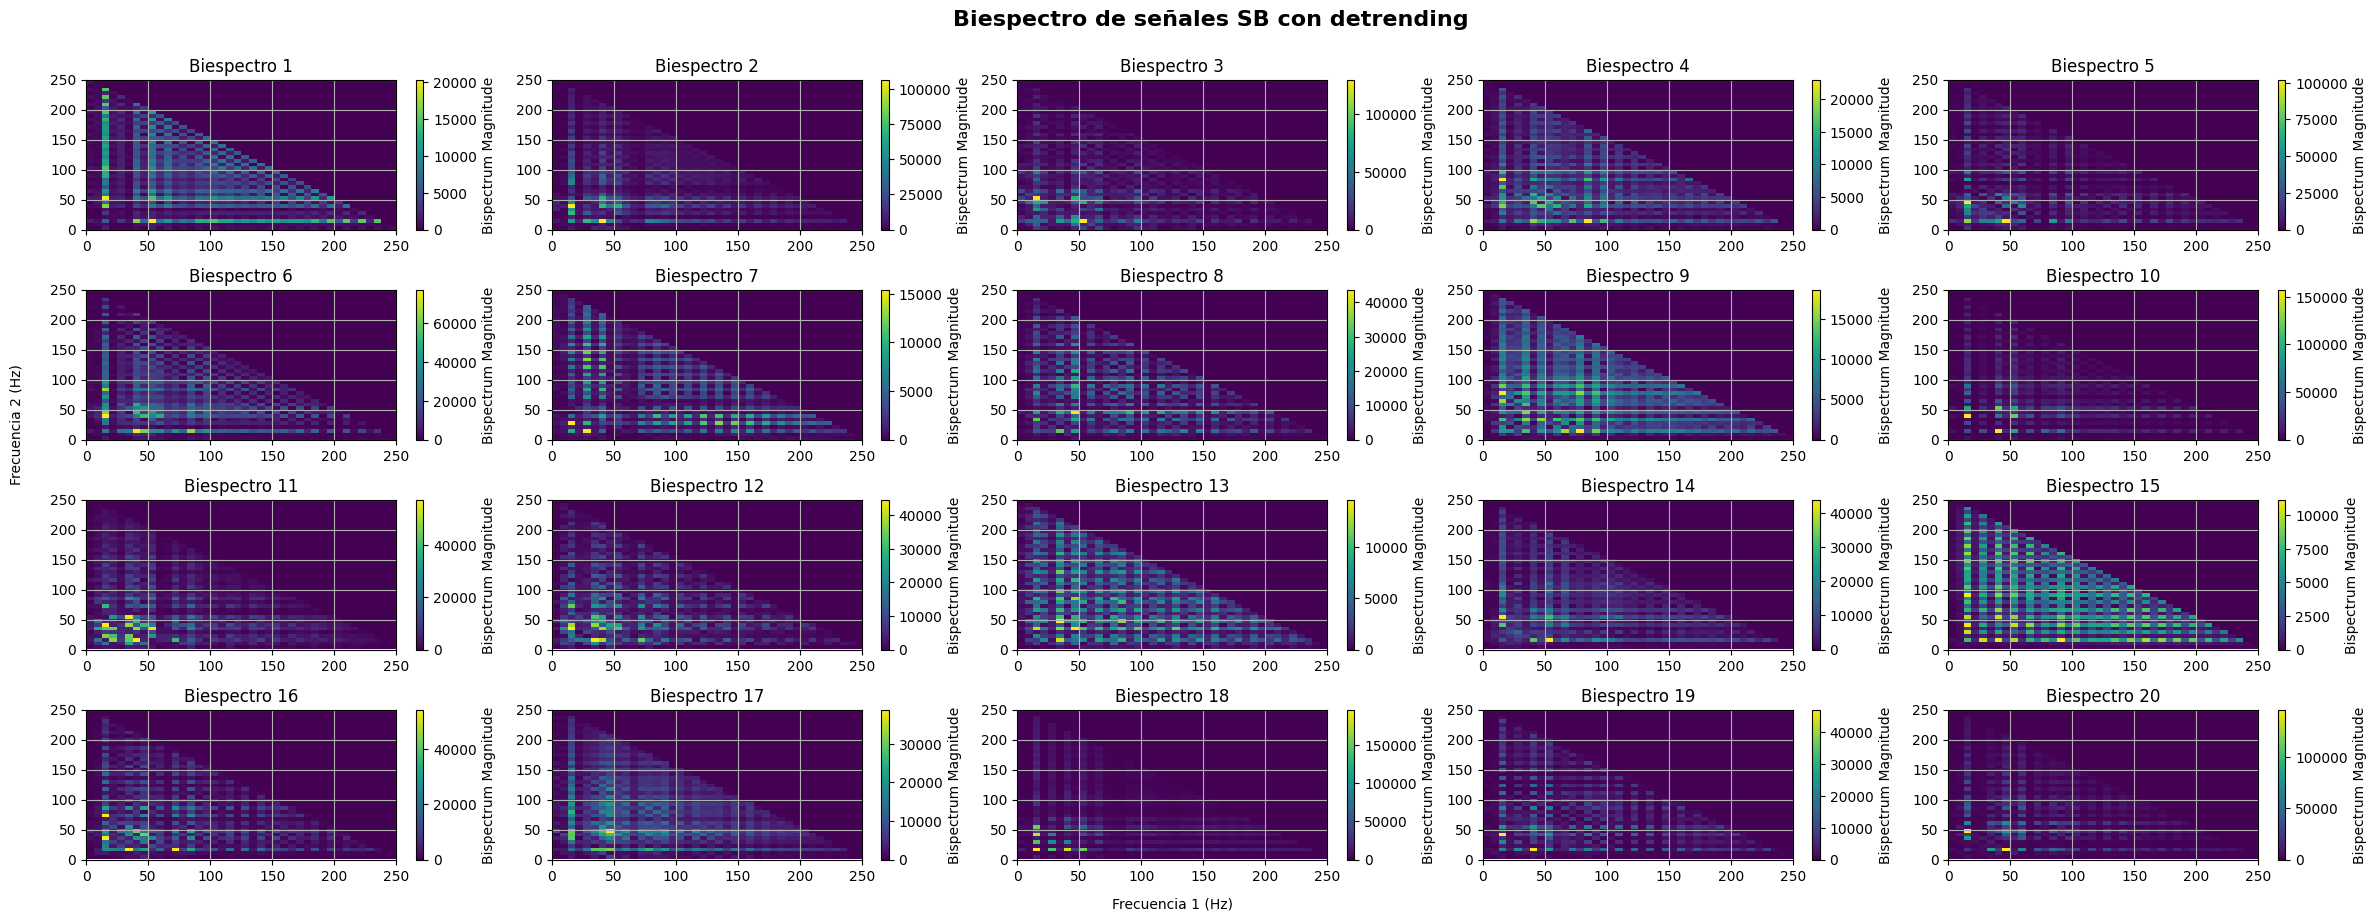

In [ ]:
fig, axs = plt.subplots(4, 5, figsize=(25, 10))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Biespectro de señales SB con detrending', x=0.55, y=0.95, fontsize=16, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_SB[:20]):
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    sig = compresion(signal_df['II'].values)
    signal_detrended = signal.detrend(sig)
    biespc = biespectro(signal_detrended, fs)

    ax = axs[i // 5, i % 5]
    im = ax.imshow(biespc, aspect='auto', extent=[0, fs/2, 0, fs/2], origin='lower', cmap='viridis')
    ax.set_title(f'Biespectro {i + 1}')
    if i == 10:
      ax.set_ylabel('Frecuencia 2 (Hz)')
      ax.yaxis.set_label_coords(-0.2, 1.5)
    if i == 17:
      ax.set_xlabel('Frecuencia 1 (Hz)')
      ax.xaxis.set_label_coords(0.5, -0.25)
    ax.grid()
    plt.colorbar(im, ax=ax, label='Bispectrum Magnitude')
plt.show()

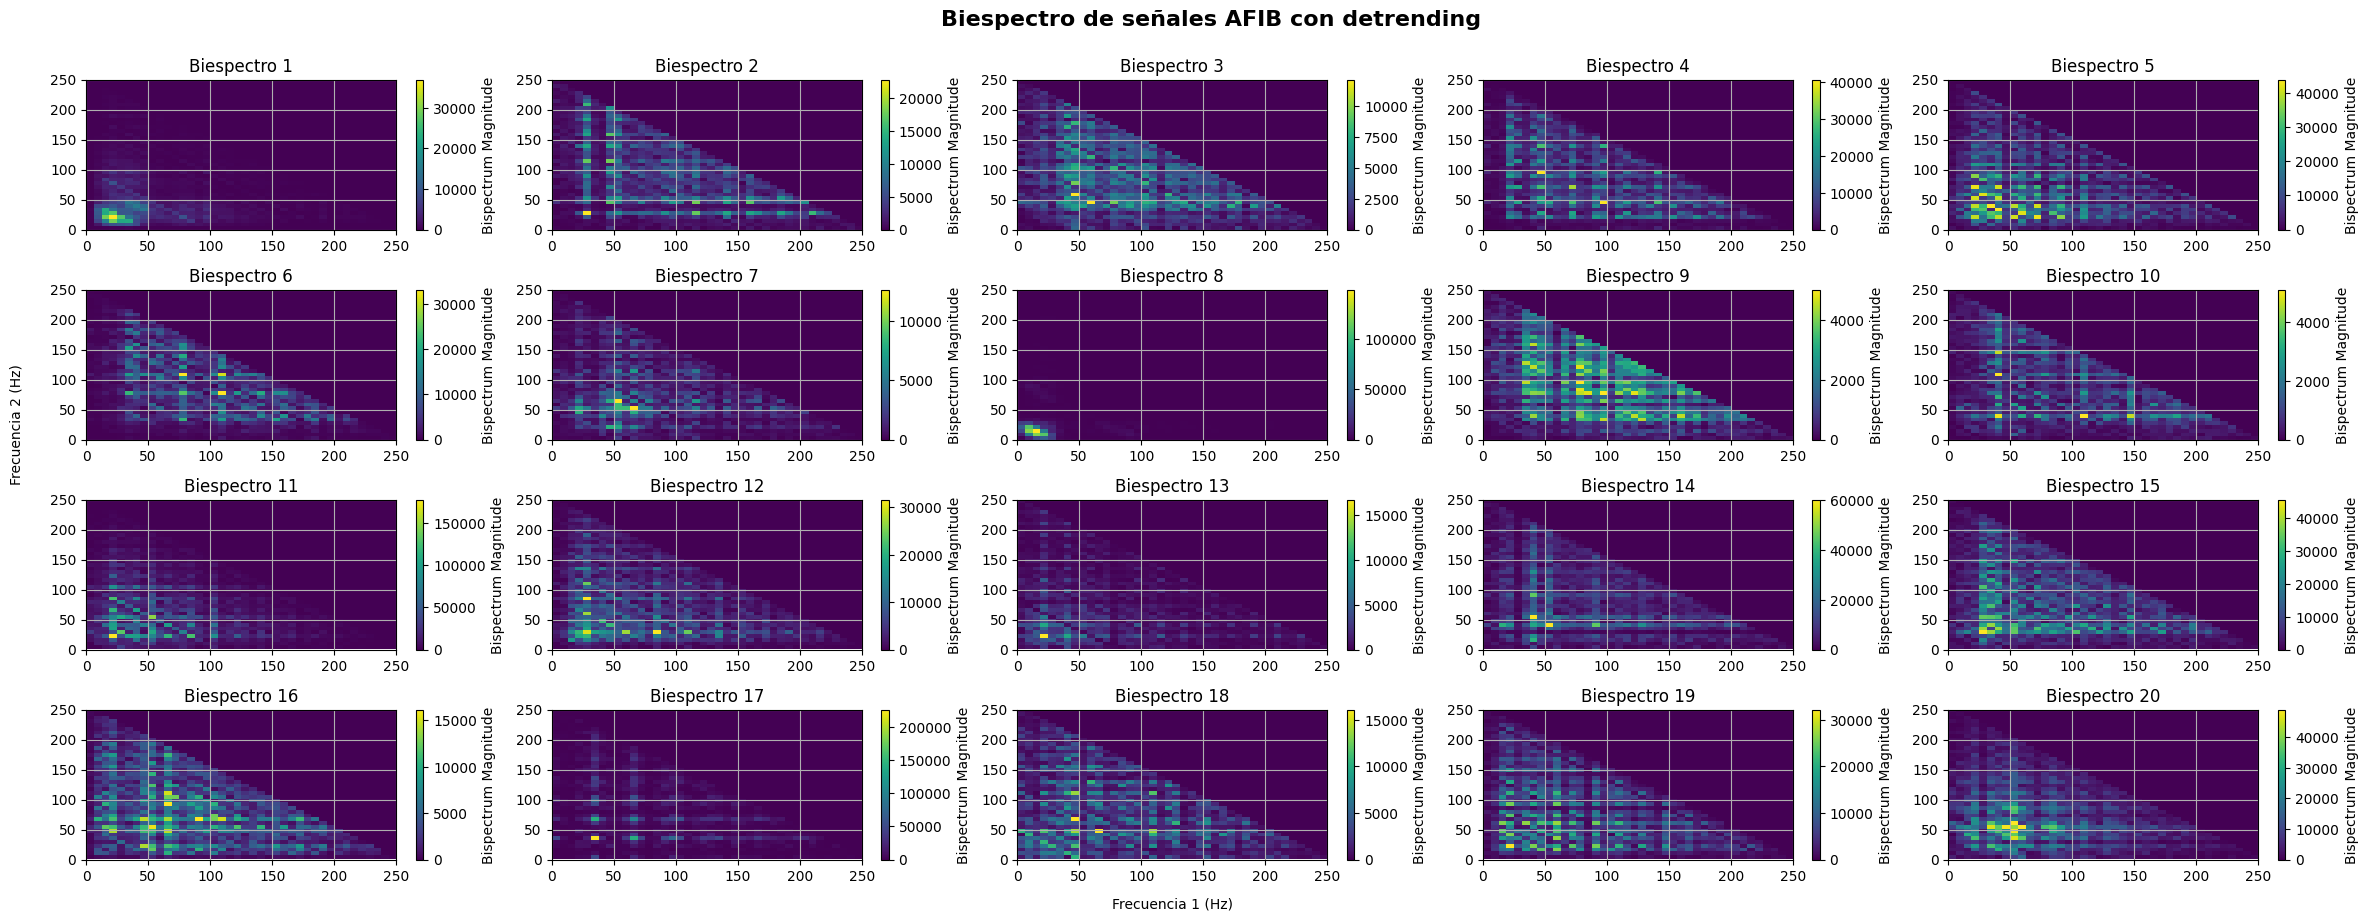

In [ ]:
fig, axs = plt.subplots(4, 5, figsize=(25, 10))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Biespectro de señales AFIB con detrending', x=0.55, y=0.95, fontsize=16, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_AFIB[:20]):
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    sig = compresion(signal_df['II'].values)
    signal_detrended = signal.detrend(sig)
    biespc = biespectro(signal_detrended, fs)

    ax = axs[i // 5, i % 5]
    im = ax.imshow(biespc, aspect='auto', extent=[0, fs/2, 0, fs/2], origin='lower', cmap='viridis')
    ax.set_title(f'Biespectro {i + 1}')
    if i == 10:
      ax.set_ylabel('Frecuencia 2 (Hz)')
      ax.yaxis.set_label_coords(-0.2, 1.5)
    if i == 17:
      ax.set_xlabel('Frecuencia 1 (Hz)')
      ax.xaxis.set_label_coords(0.5, -0.25)
    ax.grid()
    plt.colorbar(im, ax=ax, label='Bispectrum Magnitude')
plt.show()

Por cuestiones de recursos computacionales limitados, se muestran los biespectros promedios de los primeros 1000 registros SB y AFIB, con el fin de generalizar el comportamiento general de las señales para las frecuencias de interés. Se observan magnitudes mayores en frecuencias alrededor de 20 Hz y 40 Hz para las señales de ambas poblaciones.

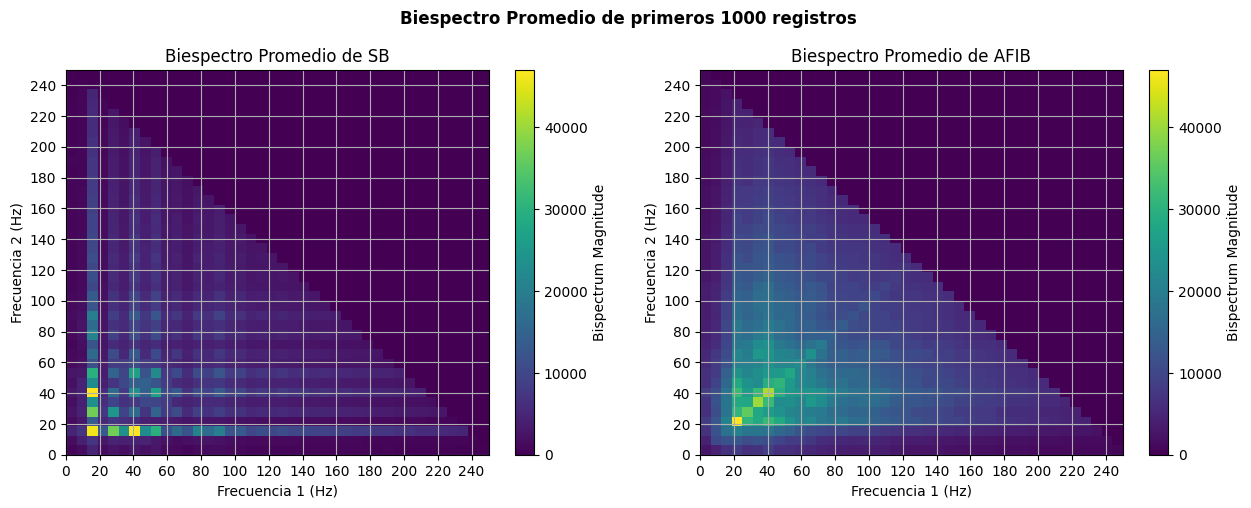

In [ ]:
biespectros_SB, biespectros_AFIB = [], []
fs = 500

for archivo in lista_archivos_SB[:1000]:
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    sig = compresion(signal_df['II'].values)
    sig_detrended = signal.detrend(sig)
    biespc = biespectro(sig_detrended, fs)
    biespectros_SB.append(biespc)

for archivo in lista_archivos_AFIB[:1000]:
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    sig = compresion(signal_df['II'].values)
    sig_detrended = signal.detrend(sig)
    biespc = biespectro(sig_detrended, fs)
    biespectros_AFIB.append(biespc)

biespectro_promedio_SB = np.mean(biespectros_SB, axis=0)
biespectro_promedio_AFIB = np.mean(biespectros_AFIB, axis=0)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Biespectro Promedio de primeros 1000 registros', x=0.5, y=1, fontsize=12, fontweight='bold')

im1 = axs[0].imshow(biespectro_promedio_SB, aspect='auto', extent=[0, fs/2, 0, fs/2], origin='lower', cmap='viridis')
axs[0].set_title('Biespectro Promedio de SB')
axs[0].set_xlabel('Frecuencia 1 (Hz)')
axs[0].set_ylabel('Frecuencia 2 (Hz)')
axs[0].set_xticks(np.arange(0, fs/2 + 1, 20))
axs[0].set_yticks(np.arange(0, fs/2 + 1, 20))
axs[0].grid()
fig.colorbar(im1, ax=axs[0], label='Bispectrum Magnitude')

im2 = axs[1].imshow(biespectro_promedio_AFIB, aspect='auto', extent=[0, fs/2, 0, fs/2], origin='lower', cmap='viridis')
axs[1].set_title('Biespectro Promedio de AFIB')
axs[1].set_xlabel('Frecuencia 1 (Hz)')
axs[1].set_ylabel('Frecuencia 2 (Hz)')
axs[1].set_xticks(np.arange(0, fs/2 + 1, 20))
axs[1].set_yticks(np.arange(0, fs/2 + 1, 20))
axs[1].grid()
fig.colorbar(im1, ax=axs[1], label='Bispectrum Magnitude')
plt.show()

Las frecuencias de interés se reafirman con los gráficos de PSD (Power Spectral Densidad) que indican la distribución de energía por frecuencia. Se observa que la densidad de potencia se concentra en frecuencias menores a 30 Hz para los 20 primeros registros de cada población (SB y AFIB).

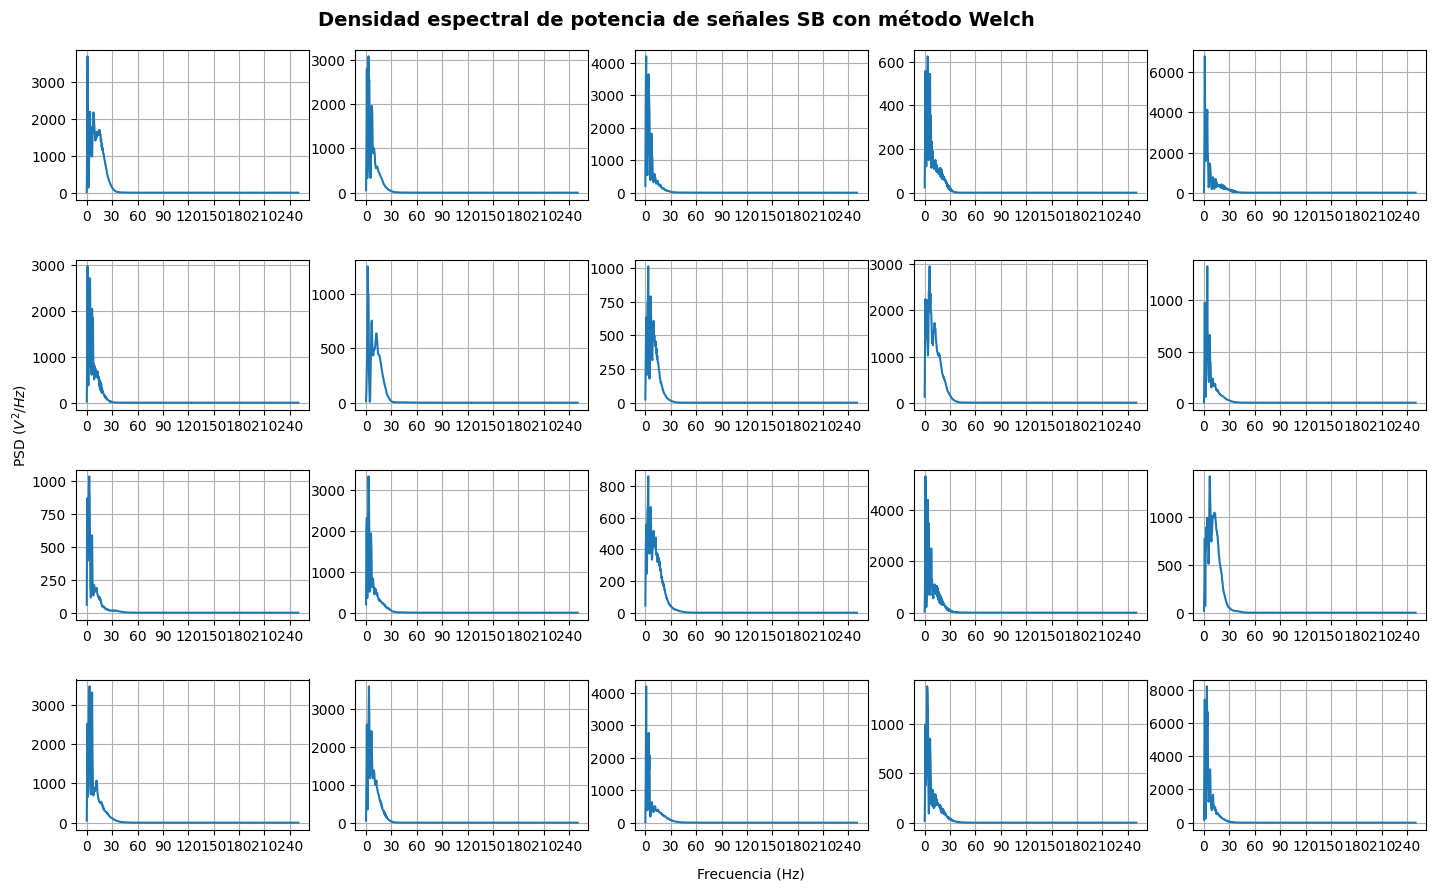

In [ ]:
fig, axs = plt.subplots(4, 5, figsize=(15, 10))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Densidad espectral de potencia de señales SB con método Welch', x=0.5, y=0.92, fontsize=14, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_SB[:20]):
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    sig = signal_df['II'].values
    signal_detrended = signal.detrend(sig)
    frequencies, Pxx_den = signal.welch(signal_detrended, fs, nperseg=1024, noverlap=512)

    ax = axs[i // 5, i % 5]
    ax.plot(frequencies, Pxx_den)
    ax.set_xticks(np.arange(0, fs/2 + 1, 30))
    if i == 10:
      ax.set_ylabel('PSD ($V^2/Hz$)')
      ax.yaxis.set_label_coords(-0.2, 1.3)
    if i == 17:
      ax.set_xlabel('Frecuencia (Hz)')
      ax.xaxis.set_label_coords(0.5, -0.25)
    ax.grid()
plt.show()

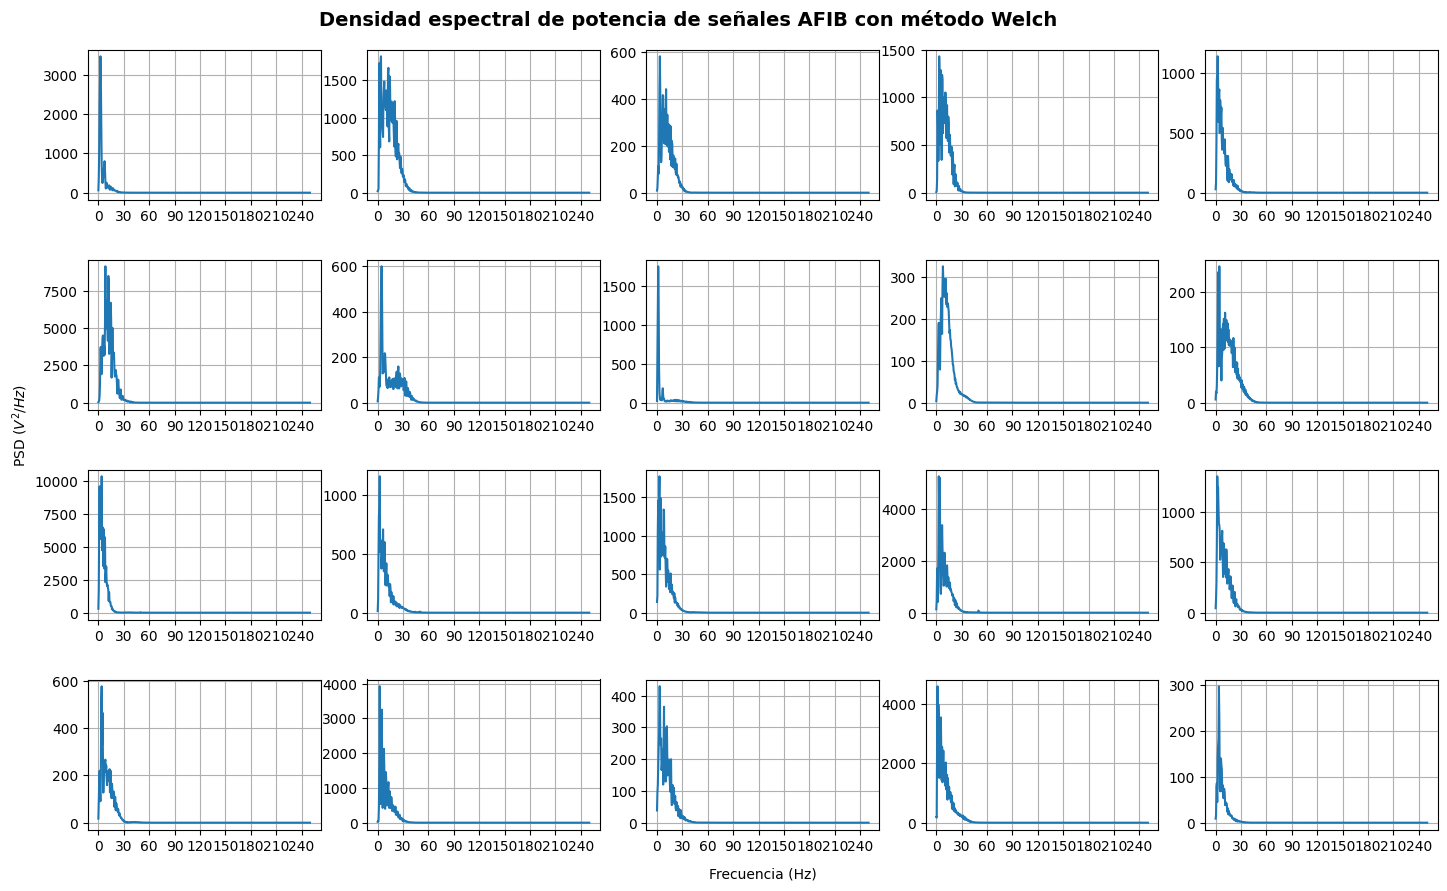

In [ ]:
fig, axs = plt.subplots(4, 5, figsize=(15, 10))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Densidad espectral de potencia de señales AFIB con método Welch', x=0.5, y=0.92, fontsize=14, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_AFIB[:20]):
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    sig = signal_df['II'].values
    signal_detrended = signal.detrend(sig)
    frequencies, Pxx_den = signal.welch(signal_detrended, fs, nperseg=1024, noverlap=512)

    ax = axs[i // 5, i % 5]
    ax.plot(frequencies, Pxx_den)
    ax.set_xticks(np.arange(0, fs/2 + 1, 30))
    if i == 10:
      ax.set_ylabel('PSD ($V^2/Hz$)')
      ax.yaxis.set_label_coords(-0.25, 1.3)
    if i == 17:
      ax.set_xlabel('Frecuencia (Hz)')
      ax.xaxis.set_label_coords(0.5, -0.25)
    ax.grid()
plt.show()

###<h4><b>4. </b>Para cada señal extraer la frecuencia que contiene la máxima potencia y graficarla.</h4>

Al igual que en numerales anteriores, se grafican los primeros 20 registros de cada población por los recursos limitados de memoria y tiempo de ejecución. Por otro lado, se almacenan en una lista todas las potencias máximas de las señales para almacenarlas en el dataframe del numeral 6.

In [ ]:
def frecuencia_max_potencia(signal, fs):
    N = len(signal)
    fft_vals = np.fft.fft(signal)
    freqs = np.fft.fftfreq(N, 1/fs)
    fft_vals = fft_vals[:N//2]
    freqs = freqs[:N//2]
    potencia = np.abs(fft_vals)**2
    idx_max = np.argmax(potencia)
    freq_max = freqs[idx_max]
    pot_max = potencia[idx_max]

    return freq_max, pot_max, freqs, potencia

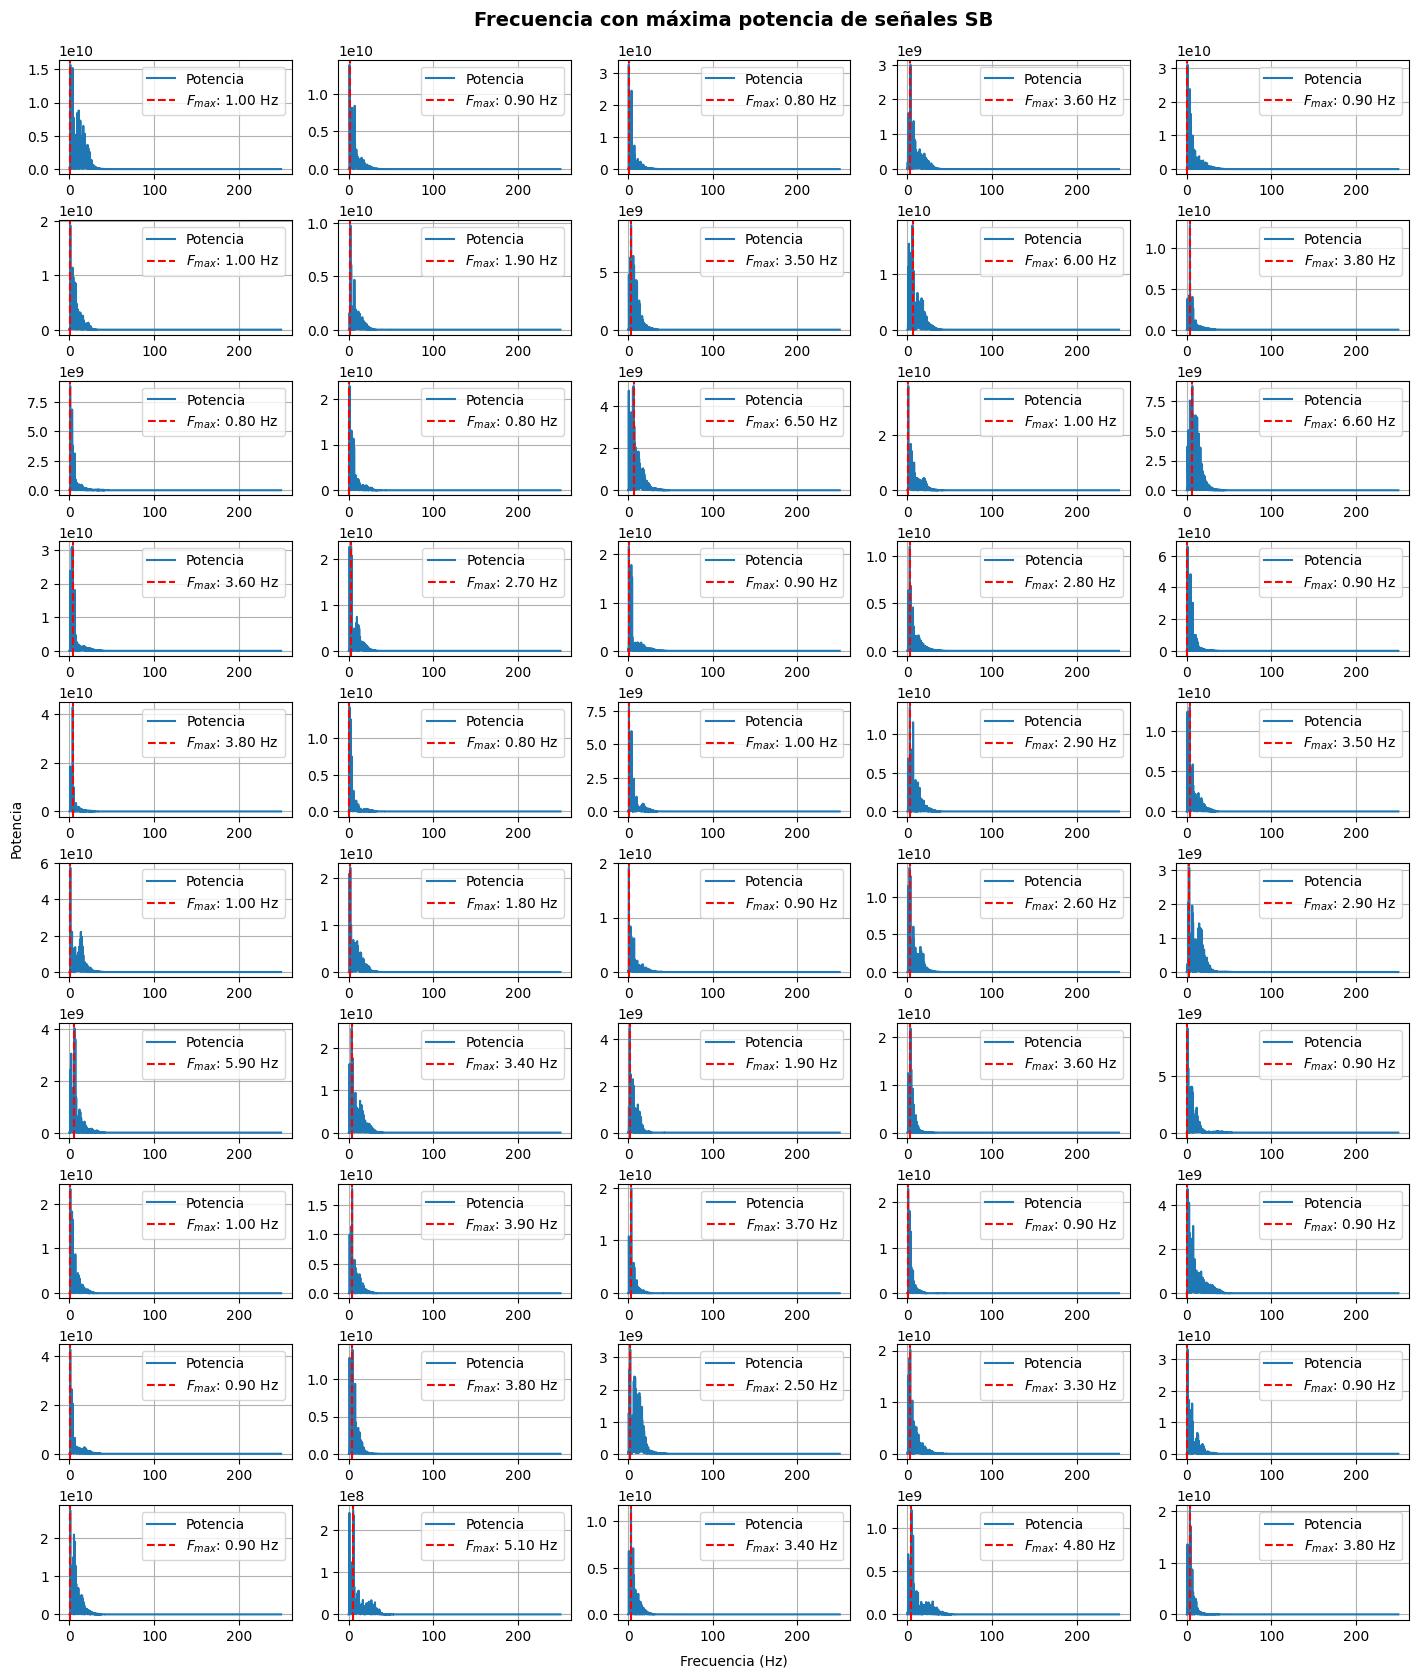

In [ ]:
fig, axs = plt.subplots(10, 5, figsize=(15, 20))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Frecuencia con máxima potencia de señales SB', x=0.55, y=0.905, fontsize=14, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_SB[:50]):
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    sig = signal_df['II'].values
    signal_detrended = signal.detrend(sig)
    freq_max, pot_max, freqs, potencia = frecuencia_max_potencia(signal_detrended, fs)

    ax = axs[i // 5, i % 5]
    ax.plot(freqs, potencia, label='Potencia')
    ax.axvline(freq_max, color='r', linestyle='--', label=f'$F_{{max}}$: {freq_max:.2f} Hz')
    if i == 25:
      ax.set_ylabel('Potencia')
      ax.yaxis.set_label_coords(-0.15, 1.3)
    if i == 47:
      ax.set_xlabel('Frecuencia (Hz)')
      ax.xaxis.set_label_coords(0.5, -0.3)
    ax.grid()
    ax.legend()
plt.show()

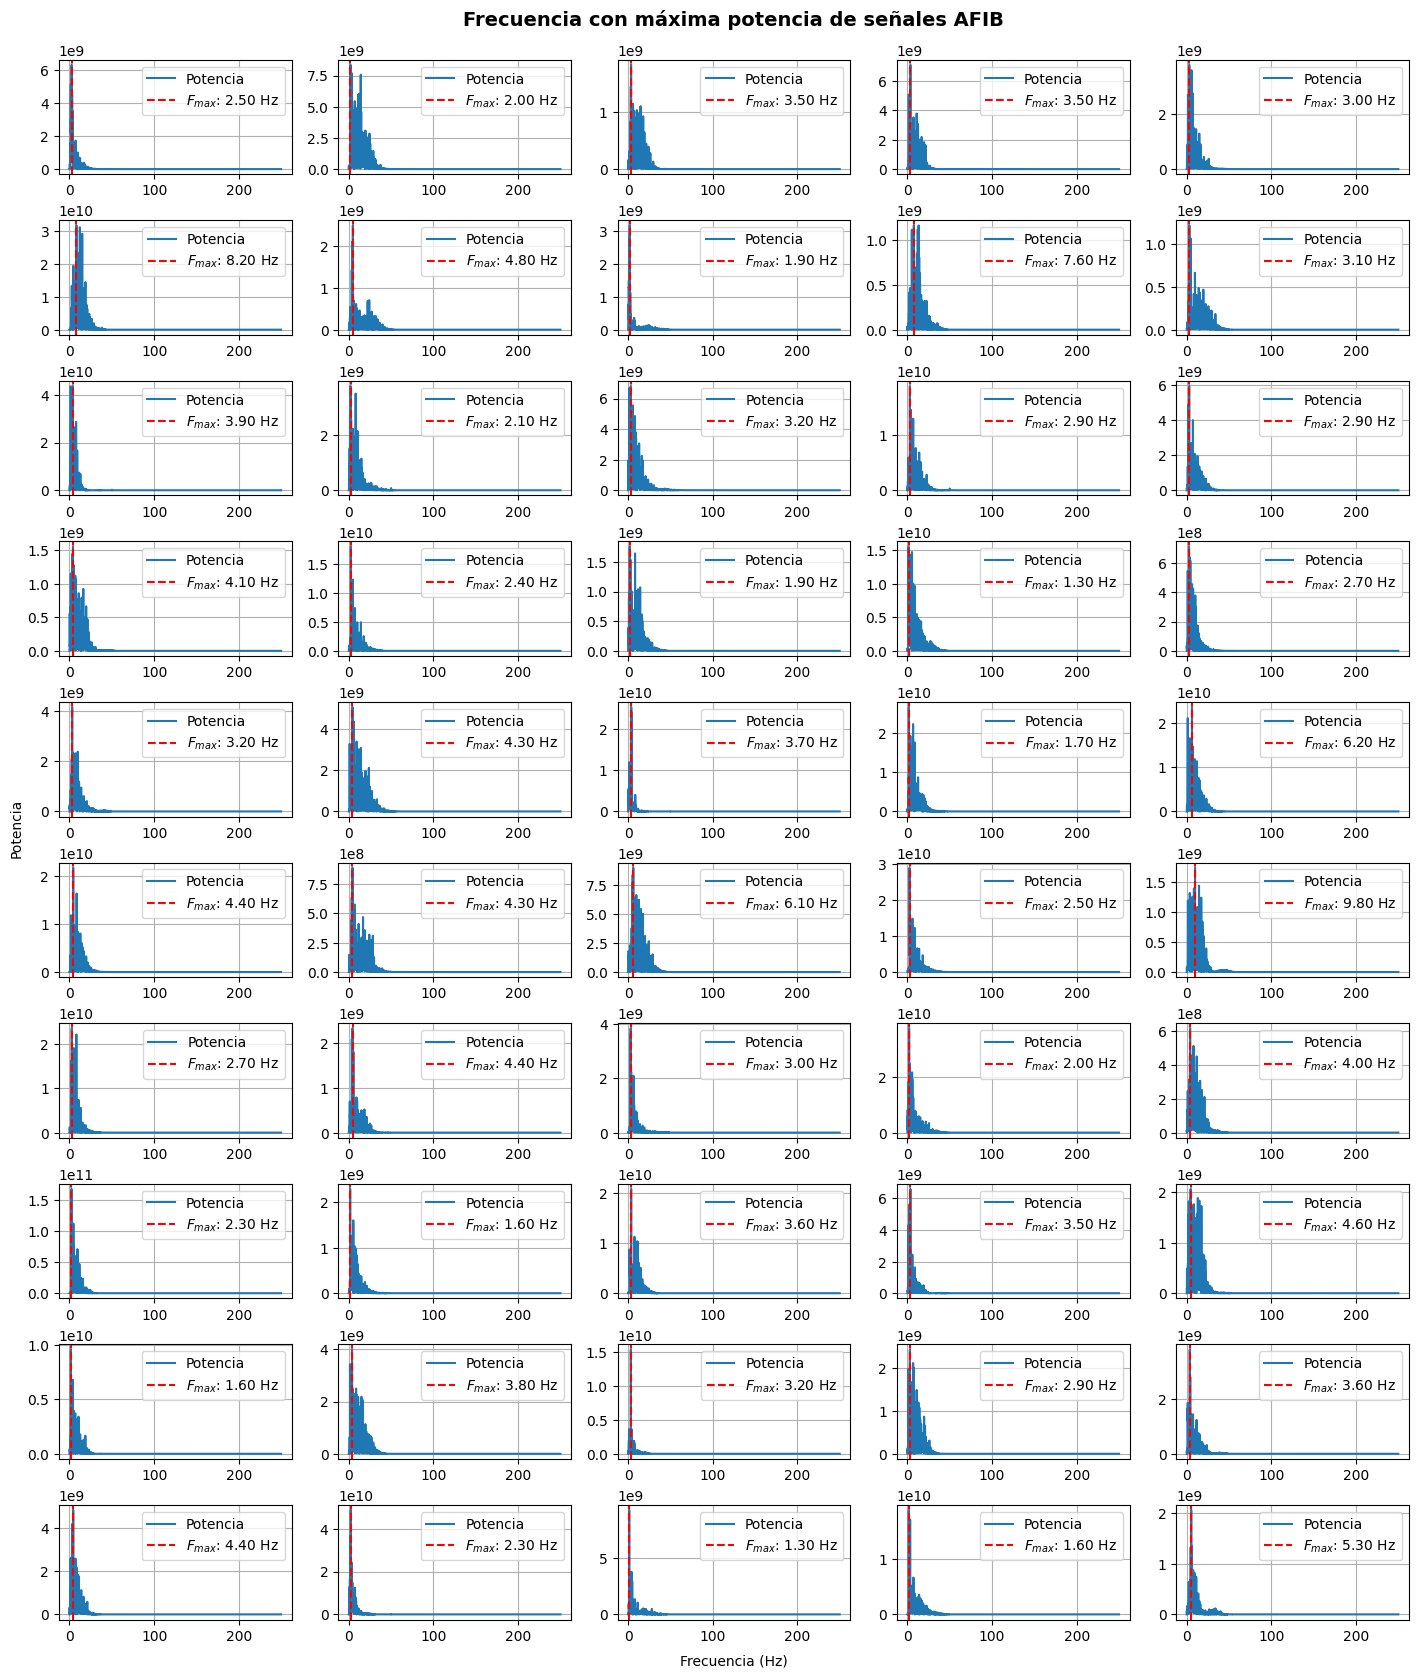

In [ ]:
fig, axs = plt.subplots(10, 5, figsize=(15, 20))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Frecuencia con máxima potencia de señales AFIB', x=0.55, y=0.905, fontsize=14, fontweight='bold')
fs = 500

for i, archivo in enumerate(lista_archivos_AFIB[:50]):
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    sig = signal_df['II'].values
    signal_detrended = signal.detrend(sig)
    freq_max, pot_max, freqs, potencia = frecuencia_max_potencia(signal_detrended, fs)

    ax = axs[i // 5, i % 5]
    ax.plot(freqs, potencia, label='Potencia')
    ax.axvline(freq_max, color='r', linestyle='--', label=f'$F_{{max}}$: {freq_max:.2f} Hz')
    if i == 25:
      ax.set_ylabel('Potencia')
      ax.yaxis.set_label_coords(-0.15, 1.3)
    if i == 47:
      ax.set_xlabel('Frecuencia (Hz)')
      ax.xaxis.set_label_coords(0.5, -0.3)
    ax.grid()
    ax.legend()
plt.show()

In [ ]:
frec_max_potencia_SB, frec_max_potencia_AFIB = [], []

for archivo in lista_archivos_SB:
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    sig = signal_df['II'].values
    signal_detrended = signal.detrend(sig)
    freq_max, pot_max, freqs, potencia = frecuencia_max_potencia(signal_detrended, fs)
    frec_max_potencia_SB.append(freq_max)

for archivo in lista_archivos_AFIB:
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    sig = signal_df['II'].values
    signal_detrended = signal.detrend(sig)
    freq_max, pot_max, freqs, potencia = frecuencia_max_potencia(signal_detrended, fs)
    frec_max_potencia_AFIB.append(freq_max)

<b>Frecuencias más bajas y regulares en SB:</b> La bradicardia sinusal muestra una mayor regularidad en la distribución de la potencia en frecuencias bajas (menos dispersión), lo que indica un ritmo regular aunque más lento.


<b>Frecuencias ligeramente más altas y dispersas en AFIB:</b> La fibrilación auricular, en cambio, tiene una distribución de potencia más dispersa, con algunos picos en frecuencias más altas, lo que refleja la naturaleza caótica y rápida de la actividad eléctrica auricular <b>[7]</b>.

###<h4><b>5. </b>Para cada señal sumar el número de frecuencias que son significativas para bicoherencia, las cuales tienen un valor superior a $\sqrt{\frac{9.2}{2*N}}$</h4>

Se grafica la bicoherencia de los primeros 50 registros de cada grupo poblacional, mientras que se guardan en una lista los de todos los registros para el numeral 6.

In [ ]:
fig, axs = plt.subplots(10, 5, figsize=(15, 20))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Bicoherencia de señales SB', x=0.55, y=0.905, fontsize=14, fontweight='bold')
fs = 500
window_size = 750

for i, archivo in enumerate(lista_archivos_SB[:50]):
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    sig = compresion(signal_df['II'].values)
    signal_detrended = signal.detrend(sig)
    bic = bicoherencia(signal_detrended, fs, window_size)

    ax = axs[i // 5, i % 5]
    im = ax.imshow(bic, aspect='auto', origin='lower', cmap='viridis')
    if i == 25:
      ax.set_ylabel('Frecuencia 2 (Hz)')
      ax.yaxis.set_label_coords(-0.15, 1.3)
    if i == 47:
      ax.set_xlabel('Frecuencia 1 (Hz)')
      ax.xaxis.set_label_coords(0.5, -0.3)
    plt.colorbar(im, ax=ax)
    ax.grid()
plt.show()

In [ ]:
fig, axs = plt.subplots(10, 5, figsize=(15, 20))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Bicoherencia de señales AFIB', x=0.55, y=0.905, fontsize=14, fontweight='bold')
fs = 500
window_size = 750

for i, archivo in enumerate(lista_archivos_AFIB[:50]):
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    sig = compresion(signal_df['II'].values)
    signal_detrended = signal.detrend(sig)
    bic = bicoherencia(signal_detrended, fs, window_size)

    ax = axs[i // 5, i % 5]
    im = ax.imshow(bic, aspect='auto', origin='lower', cmap='viridis')
    if i == 25:
      ax.set_ylabel('Frecuencia 2 (Hz)')
      ax.yaxis.set_label_coords(-0.15, 1.3)
    if i == 47:
      ax.set_xlabel('Frecuencia 1 (Hz)')
      ax.xaxis.set_label_coords(0.5, -0.3)
    plt.colorbar(im, ax=ax)
    ax.grid()
plt.show()

In [ ]:
def frecuencias_significativas(signal, fs, window_size, N):
    umbral = np.sqrt(9.2 / (2 * N))
    bic = bicoherencia(signal, fs, window_size)
    frec_significativas = np.sum(bic > umbral)
    return frec_significativas

In [ ]:
frec_significativas_SB, frec_significativas_AFIB = [], []
N = 5000
fs = 500
window_size = 1024

for archivo in lista_archivos_SB:
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    sig = compresion(signal_df['II'].values)
    signal_detrended = signal.detrend(sig)
    frec_significativas_SB.append(frecuencias_significativas(signal_detrended, fs, window_size, N))

for archivo in lista_archivos_AFIB:
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    sig = compresion(signal_df['II'].values)
    signal_detrended = signal.detrend(sig)
    frec_significativas_AFIB.append(frecuencias_significativas(signal_detrended, fs, window_size, N))

###<h4><b>6. </b>Crear una rutina que aplique sobre todos los archivos de la base de datos los numerales del 3 al 5 y almacene los resultados en un dataframe con las siguientes columnas:</h4>

> * <h4>Registro</h4>
* <h4>Tipo de patología o Estado</h4>
* <h4>Frecuencia de máxima potencia (fMP)</h4>
* <h4>Suma de frecuencias significativas en bicoherencia (sFSB)</h4>

En primer lugar, se aplican las fórmulas del numeral 4 que no se graficaron o implementaron anteriormente (desviación de la señal con detrending respecto a la original, y compresión de la señal). Se muestran los procedimientos solo para los primeros 50 registros de cada población.

In [ ]:
fig, axs = plt.subplots(10, 5, figsize=(15, 20))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Señales SB con detrend y compresión', x=0.55, y=0.905, fontsize=14, fontweight='bold')

for i, archivo in enumerate(lista_archivos_SB[:50]):
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    sig = signal_df['II'].values
    sig_detrend = signal.detrend(sig)
    sig_comprimida = compresion(sig_detrend)

    ax = axs[i // 5, i % 5]
    ax.plot(sig_comprimida, color='r')
    ax.legend([f'Desv: {desviacion(sig, sig_detrend):.4f}'])
    if i == 25:
      ax.set_ylabel('Amplitud')
      ax.yaxis.set_label_coords(-0.15, 1.3)
    if i == 47:
      ax.set_xlabel('Tiempo')
      ax.xaxis.set_label_coords(0.5, -0.3)
    ax.grid()
plt.show()

In [ ]:
fig, axs = plt.subplots(10, 5, figsize=(15, 20))
plt.subplots_adjust(left=0.1, right=1, bottom=0.1, wspace=0.2, hspace=0.4)
fig.suptitle('Señales AFIB con detrend y compresión', x=0.55, y=0.905, fontsize=14, fontweight='bold')

for i, archivo in enumerate(lista_archivos_AFIB[:50]):
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    sig = signal_df['II'].values
    sig_detrend = signal.detrend(sig)
    sig_comprimida = compresion(sig_detrend)

    ax = axs[i // 5, i % 5]
    ax.plot(sig_comprimida, color='r')
    ax.legend([f'Desv: {desviacion(sig, sig_detrend):.4f}'])
    if i == 25:
      ax.set_ylabel('Amplitud')
      ax.yaxis.set_label_coords(-0.15, 1.3)
    if i == 47:
      ax.set_xlabel('Tiempo')
      ax.xaxis.set_label_coords(0.5, -0.3)
    ax.grid()
plt.show()

Por otro lado, se construye un dataframe con todos los registros de ambas poblaciones y las métricas relacionadas a las frecuencias de interés.

In [ ]:
signals = []
for i, archivo in enumerate(lista_archivos_SB):
  path = Path(archivo)
  file_name = path.name[:-4]
  signals.append({'Registro': file_name, 'Estado': 'SB', 'fMP': frec_max_potencia_SB[i], 'sFSB': frec_significativas_SB[i]})

for i, archivo in enumerate(lista_archivos_AFIB):
  path = Path(archivo)
  file_name = path.name[:-4]
  signals.append({'Registro': file_name, 'Estado': 'AFIB', 'fMP': frec_max_potencia_SB[i], 'sFSB': frec_significativas_SB[i]})
df_signals = pd.DataFrame(signals)
df_signals

###<h4><b>7. </b>Para las señales de análisis aplicar las rutinas del punto 3 al 5 y hacer un informe que permita evidenciar las diferencias entre las señales SB y AFIB utilizando las herramientas de estadística descriptiva.</h4>

A partir del dataframe generado con los datos de cada registro de las dos poblaciones (SB y AFIB), se realizaron descripciones estadísticas de las señales con el fin de establecer diferencias entre las poblaciones.

In [ ]:
df_signals.loc[df_signals['Estado'] == 'SB'].describe()

In [ ]:
df_signals.loc[df_signals['Estado'] == 'AFIB'].describe()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(30, 5))
plt.subplots_adjust(left=0.1, right=0.4, bottom=0.1, wspace=0.2, hspace=0.4)

sns.kdeplot(data=df_signals, x='fMP', hue='Estado', ax=axs[0])
axs[0].set_title('Distribución frecuencias de máxima potencia')
axs[0].set_xlabel('Frecuencia (Hz)')
axs[0].grid()

sns.kdeplot(data=df_signals, x='sFSB', hue='Estado', ax=axs[1])
axs[1].set_title('Distribución sumatoria frecuencias significativas')
axs[1].set_xlabel('Frecuencia (Hz)')
axs[1].grid()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para fMP
plt.figure(figsize=(12, 6))
sns.boxplot(x='Estado', y='fMP', data=df_signals)
plt.title('Distribución de Frecuencia de Máxima Potencia por Patología')
plt.show()

# Boxplot para sFSB
plt.figure(figsize=(12, 6))
sns.boxplot(x='TEstado', y='sFSB', data=df_signals)
plt.title('Distribución de Suma de Frecuencias Significativas en Bicoherencia por Patología')
plt.show()

Las distribuciones de frecuencias de máxima potencia (fMP) de ambos grupos no presentan diferencias significativas, visualmente. Se observa una distribución levemente mayor de las señales SB, lo que se explica con la cantidad de registros de 3889, que es considerablemente mayor a la del grupo de señales AFIB con 1780 registros; no obstante la forma de las distribuciones es similar.

Lo mismo ocurre para la sumatoria de frecuencias significativas para bicoherencia (sFSB), la cual indica que los registros de ambas poblaciones presentan cantidades similares de frecuencias que cumplen el umbral mayor al nivel de significancia establecido en el artículo <b>[6]</b> de $\sqrt{\frac{9.2}{2*N}}$.

###<h4><b>8. </b>Indicar si hay o no diferencias estadísticas entre las características espectrales del punto 4 y 5 para las dos poblaciones de estudio.</h4>

Para determinar la existencia de diferencias espectrales entre los grupos SB y AFIB, se comparó el biespectro promediado de las señales. Posteriormente, se realizó la verificación de supuestos de normalidad y homocedasticidad para establecer el tipo de prueba estadística de comparación de grupos (se supone que las poblaciones son independientes entre sí).<br><br>

<b><u>Planteamiento de hipótesis</u></b>
> <b>Normalidad</b><br>
> * <b>Hipótesis Nula ($H_0$):</b> Los datos siguen una distribución normal.<br>
> * <b>Hipótesis Alternativa ($H_a$):</b> Los datos no siguen una distribución normal.

> <b>Homocedasticidad</b><br>
> * <b>Hipótesis Nula ($H_0$):</b>  Las varianzas de los grupos son iguales (homocedasticidad).<br>
> * <b>Hipótesis Alternativa ($H_a$):</b> Al menos una de las varianzas de los grupos es diferente (heterocedasticidad).

Para la verificación de las hipótesis se emplea la Prueba de Shapiro-Wilk para normalidad, y la Prueba de Levene para homocedasticidad.

In [ ]:
biespectros_SB, biespectros_AFIB = [], []
fs = 500

for i, archivo in enumerate(lista_archivos_SB):
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    sig = compresion(signal_df['II'].values)
    sig_detrended = signal.detrend(sig)
    biespc = biespectro(sig_detrended, fs)
    biespectros_SB.append(biespc)

for i, archivo in enumerate(lista_archivos_AFIB):
    signal_df = pd.read_csv(archivo, header=None, names=['II'])
    sig = compresion(signal_df['II'].values)
    sig_detrended = signal.detrend(sig)
    biespc = biespectro(sig_detrended, fs)
    biespectros_AFIB.append(biespc)

# 2. Pruebas de normalidad y homocedasticidad antes de realizar pruebas no paramétricas
def verificar_suposiciones(biespectros_SB, biespectros_AFIB):
    # Convertir listas a arrays numpy
    biespectros_SB = np.array(biespectros_SB)
    biespectros_AFIB = np.array(biespectros_AFIB)

    # Seleccionar una muestra representativa del biespectro
    n_muestras = 100 # Número de muestras que vamos a tomar para las pruebas
    biespectros_SB_sample = biespectros_SB[:, :n_muestras, :n_muestras].flatten()
    biespectros_AFIB_sample = biespectros_AFIB[:, :n_muestras, :n_muestras].flatten()

    # 2.1. Pruebas de normalidad (Shapiro-Wilk)
    print("Pruebas de normalidad para SB y AFIB:")
    # Shapiro-Wilk para SB
    stat_SB, p_value_SB = stats.shapiro(biespectros_SB_sample)
    print(f"Shapiro-Wilk SB: Estadístico={stat_SB:.4f}, p-valor={p_value_SB:.4f}")

    # Shapiro-Wilk para AFIB
    stat_AFIB, p_value_AFIB = stats.shapiro(biespectros_AFIB_sample)
    print(f"Shapiro-Wilk AFIB: Estadístico={stat_AFIB:.4f}, p-valor={p_value_AFIB:.4f}")

    # 2.2. Pruebas de homocedasticidad (Levene)
    print("\nPrueba de homocedasticidad (Levene) para SB y AFIB:")
    # Prueba de Levene
    stat_levene, p_value_levene = stats.levene(biespectros_SB_sample, biespectros_AFIB_sample)
    print(f"Levene: Estadístico={stat_levene:.4f}, p-valor={p_value_levene:.4f}")

    # Verificación de los resultados
    normal_SB = p_value_SB >= 0.05
    normal_AFIB = p_value_AFIB >= 0.05
    homocedasticidad = p_value_levene >= 0.05

    if not normal_SB or not normal_AFIB or not homocedasticidad:
        print("\nNo se cumplen los supuestos de normalidad o homocedasticidad, se procede con pruebas no paramétricas.")
        return False # No se cumplen los supuestos
    else:
        print("\nSe cumplen los supuestos de normalidad y homocedasticidad.")
        return True # Se cumplen los supuestos

# Verificar si se cumplen los supuestos para utilizar pruebas paramétricas
supuestos_parametricos = verificar_suposiciones(biespectros_SB, biespectros_AFIB)

Como en la mayor parte de las pruebas de verificación de supuestos se rechazaron las hipótesis nulas, se procede a aplicar la Prueba U de Mann-Whitney para verificar si los grupos presentan diferencias significativas entre sí, tomando como métrica el biespectro promedio de SB y AFIB.<br><br>

<b><u>Planteamiento de hipótesis</u></b>
> <b>Prueba U de Mann-Whitney (Distribuciones entre grupos)</b><br>
> * <b>Hipótesis Nula ($H_0$):</b> Las distribuciones de los dos grupos son iguales. Esto implica que no hay diferencias en las medianas de los grupos.<br>
> * <b>Hipótesis Alternativa ($H_a$):</b> Las distribuciones de los dos grupos no son iguales. Esto implica que hay diferencias en las medianas de los grupos.

Total archivos SB: 3889
Total archivos AFIB: 1780

Procesando señales SB...
Procesando archivo 1/3889
Procesando archivo 101/3889
Procesando archivo 201/3889
Procesando archivo 301/3889
Procesando archivo 401/3889
Procesando archivo 501/3889
Procesando archivo 601/3889
Procesando archivo 701/3889
Procesando archivo 801/3889
Procesando archivo 901/3889
Procesando archivo 1001/3889
Procesando archivo 1101/3889
Procesando archivo 1201/3889
Procesando archivo 1301/3889
Procesando archivo 1401/3889
Procesando archivo 1501/3889
Procesando archivo 1601/3889
Procesando archivo 1701/3889
Procesando archivo 1801/3889
Procesando archivo 1901/3889
Procesando archivo 2001/3889
Procesando archivo 2101/3889
Procesando archivo 2201/3889
Procesando archivo 2301/3889
Procesando archivo 2401/3889
Procesando archivo 2501/3889
Procesando archivo 2601/3889
Procesando archivo 2701/3889
Procesando archivo 2801/3889
Procesando archivo 2901/3889
Procesando archivo 3001/3889
Procesando archivo 3101/3889
Procesan

<ipython-input-30-9fe91ace0684>:69: RuntimeWarning: invalid value encountered in scalar divide
  d = (np.mean(valores_SB) - np.mean(valores_AFIB)) / \


Procesando fila 11/40
Procesando fila 21/40
Procesando fila 31/40


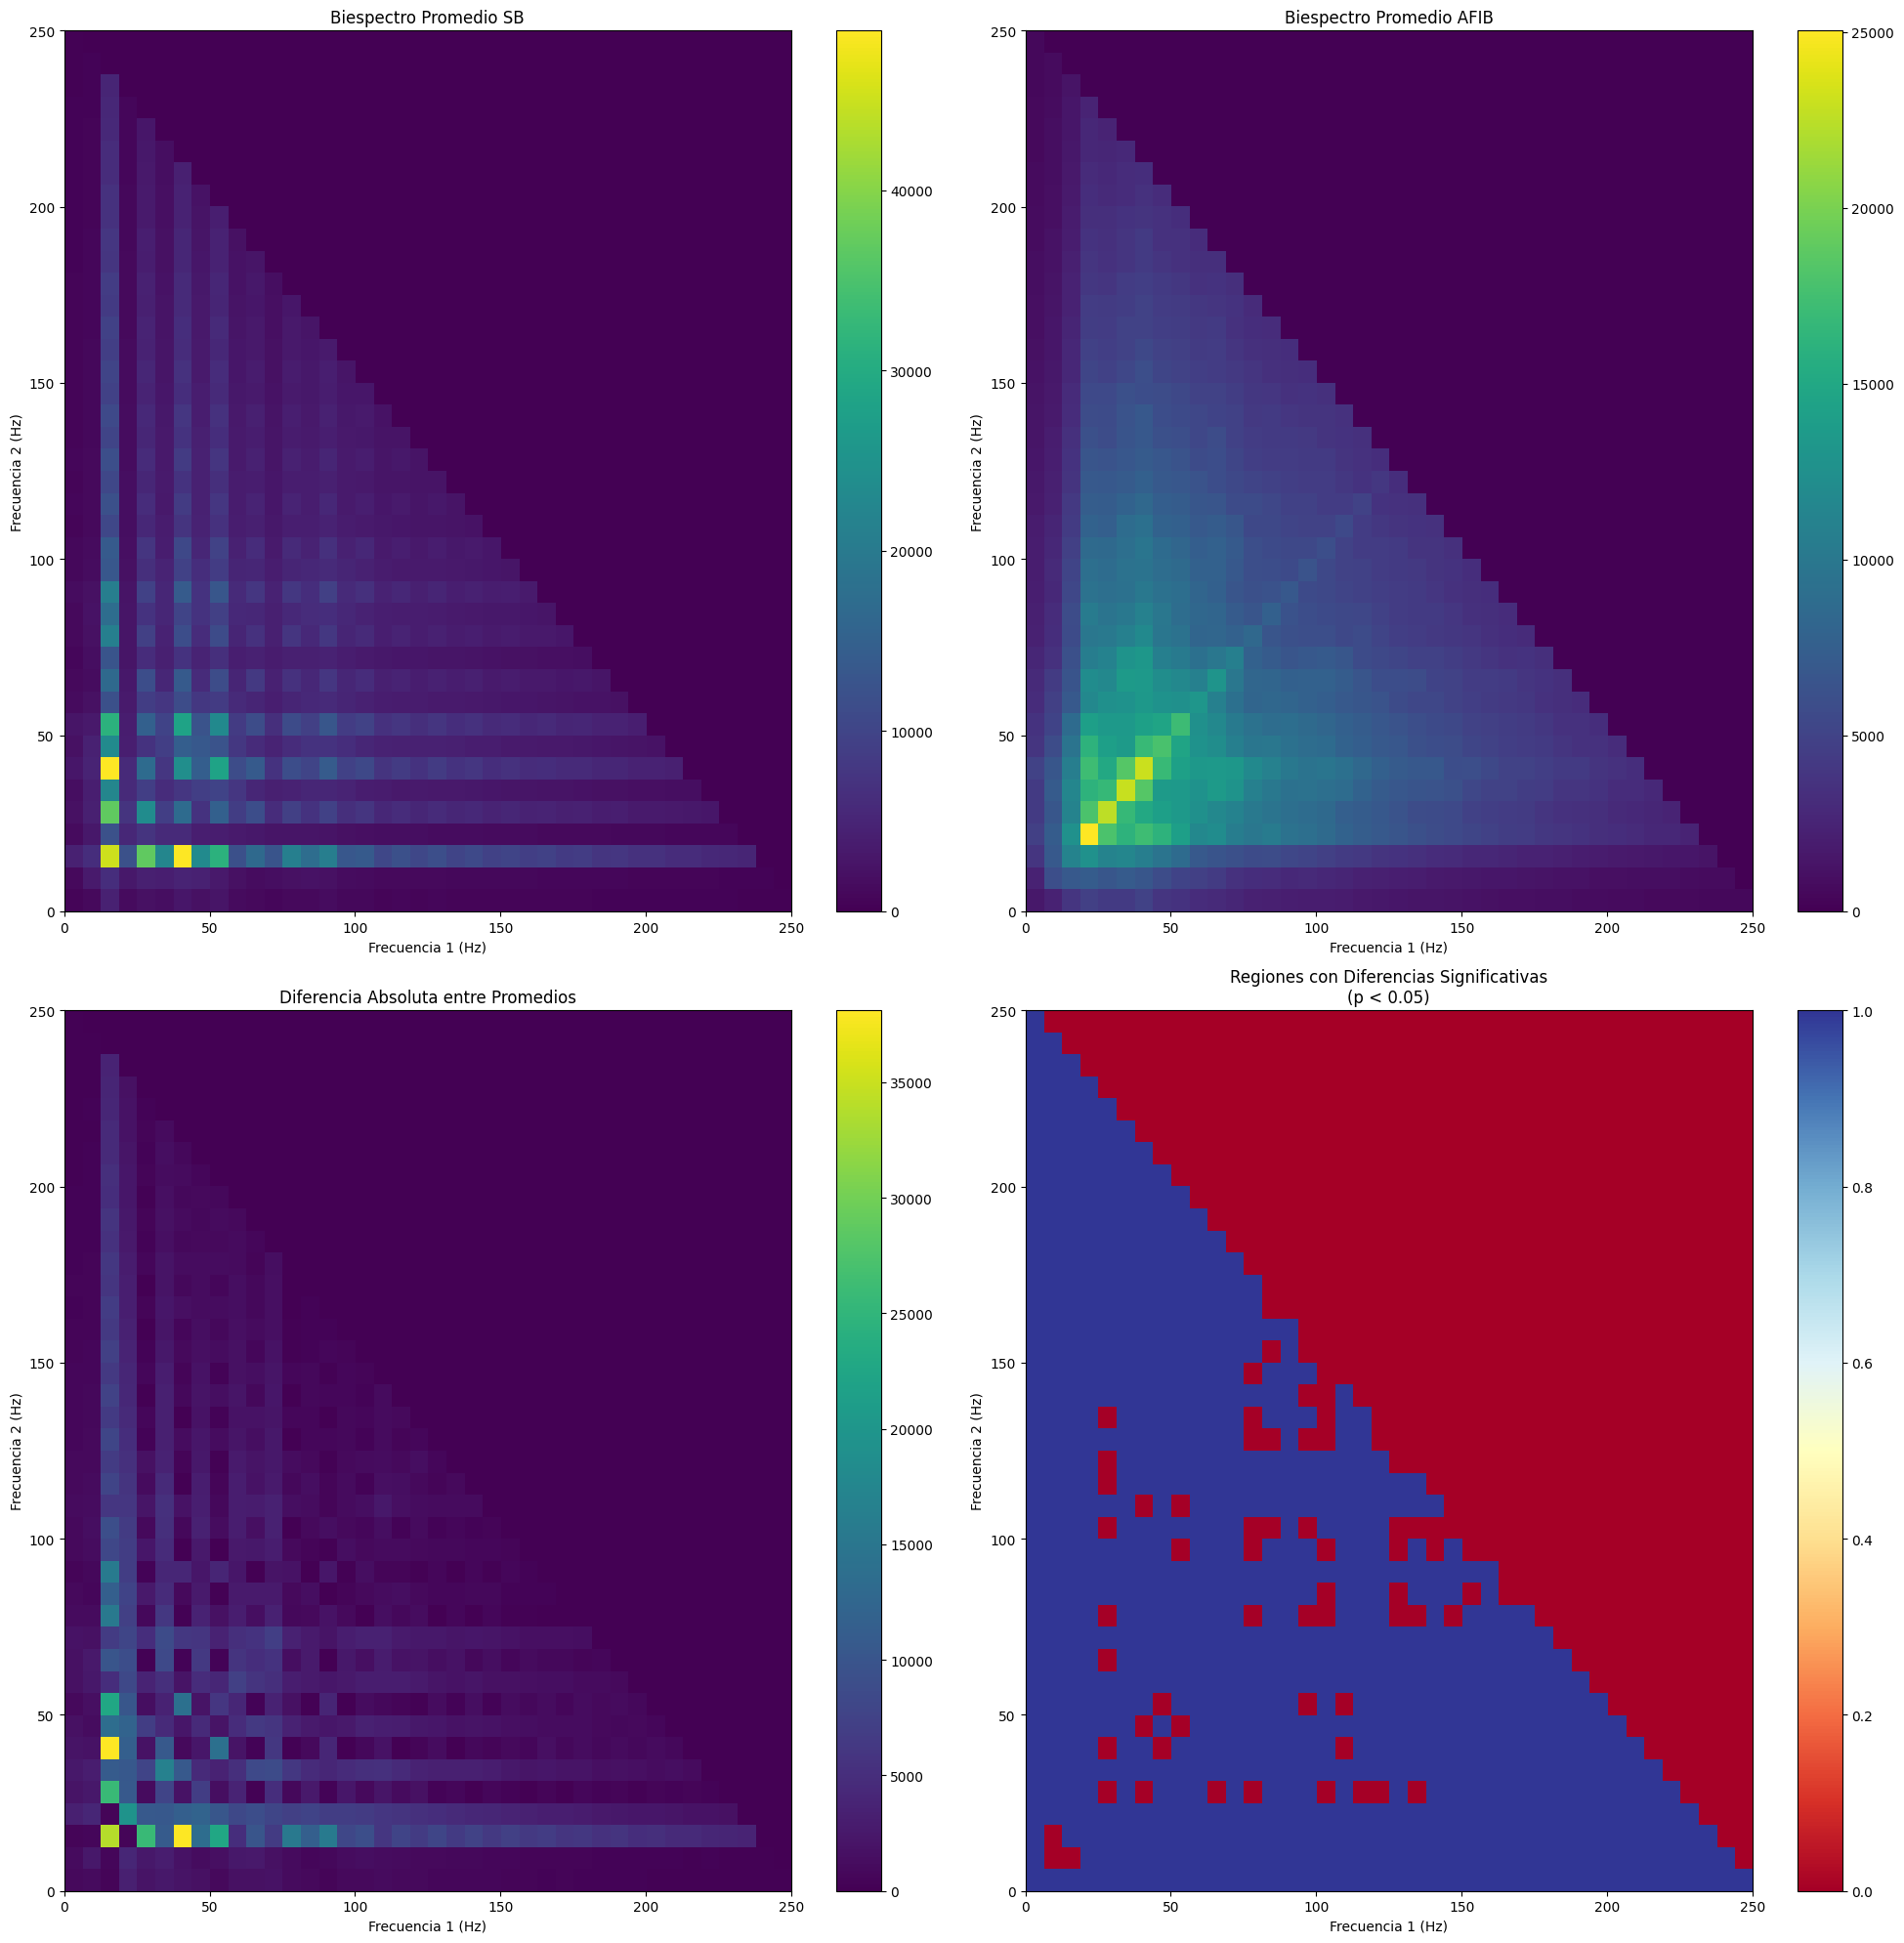


Resumen Estadístico:
Número total de señales SB: 3889
Número total de señales AFIB: 1780
Porcentaje de regiones con diferencias significativas: 47.19%
Máxima diferencia absoluta: 38107.4912
Media de la diferencia absoluta: 1369.3761
Desviación estándar de la diferencia: 3020.7753

Top 10 regiones con mayores diferencias:

Frecuencias: (12.5, 87.5) Hz
Diferencia absoluta: 15488.2314
P-valor: 0.0000e+00
Tamaño del efecto: 0.9391
Valor promedio SB: 20849.2920
Valor promedio AFIB: 5361.0606

Frecuencias: (31.2, 31.2) Hz
Diferencia absoluta: 16801.1748
P-valor: 6.9890e-151
Tamaño del efecto: -0.3852
Valor promedio SB: 6186.6183
Valor promedio AFIB: 22987.7931

Frecuencias: (50.0, 12.5) Hz
Diferencia absoluta: 22664.6985
P-valor: 3.2407e-147
Tamaño del efecto: 0.6024
Valor promedio SB: 31406.2813
Valor promedio AFIB: 8741.5828

Frecuencias: (18.8, 18.8) Hz
Diferencia absoluta: 19626.1361
P-valor: 8.8829e-254
Tamaño del efecto: -0.4006
Valor promedio SB: 5417.8868
Valor promedio AFIB: 25044.

In [ ]:
# 2. Análisis estadístico
def analizar_biespectros(biespectros_SB, biespectros_AFIB):
    biespectros_SB = np.array(biespectros_SB)
    biespectros_AFIB = np.array(biespectros_AFIB)

    # Calcular promedios
    biespectro_promedio_SB = np.mean(biespectros_SB, axis=0)
    biespectro_promedio_AFIB = np.mean(biespectros_AFIB, axis=0)

    # Diferencia absoluta
    diff = np.abs(biespectro_promedio_SB - biespectro_promedio_AFIB)

    # Prueba estadística punto a punto
    shape = biespectro_promedio_SB.shape
    p_values = np.zeros(shape)
    effect_sizes = np.zeros(shape)

    for i in range(shape[0]):
        for j in range(shape[1]):
            valores_SB = biespectros_SB[:, i, j]
            valores_AFIB = biespectros_AFIB[:, i, j]

            # Mann-Whitney U test
            _, p_values[i,j] = stats.mannwhitneyu(valores_SB, valores_AFIB, alternative='two-sided')

            # Tamaño del efecto (Cohen's d)
            d = (np.mean(valores_SB) - np.mean(valores_AFIB)) / \
                np.sqrt((np.std(valores_SB)**2 + np.std(valores_AFIB)**2) / 2)
            effect_sizes[i,j] = d

    # Visualización
    fig, axs = plt.subplots(2, 2, figsize=(20, 20))

    # 1. Biespectro promedio SB
    im1 = axs[0,0].imshow(biespectro_promedio_SB, aspect='auto', extent=[0, fs/2, 0, fs/2],
                         origin='lower', cmap='viridis')
    axs[0,0].set_title('Biespectro Promedio SB')
    axs[0,0].set_xlabel('Frecuencia 1 (Hz)')
    axs[0,0].set_ylabel('Frecuencia 2 (Hz)')
    plt.colorbar(im1, ax=axs[0,0])

    # 2. Biespectro promedio AFIB
    im2 = axs[0,1].imshow(biespectro_promedio_AFIB, aspect='auto', extent=[0, fs/2, 0, fs/2],
                         origin='lower', cmap='viridis')
    axs[0,1].set_title('Biespectro Promedio AFIB')
    axs[0,1].set_xlabel('Frecuencia 1 (Hz)')
    axs[0,1].set_ylabel('Frecuencia 2 (Hz)')
    plt.colorbar(im2, ax=axs[0,1])

    # 3. Diferencia absoluta
    im3 = axs[1,0].imshow(diff, aspect='auto', extent=[0, fs/2, 0, fs/2],
                         origin='lower', cmap='viridis')
    axs[1,0].set_title('Diferencia Absoluta entre Promedios')
    axs[1,0].set_xlabel('Frecuencia 1 (Hz)')
    axs[1,0].set_ylabel('Frecuencia 2 (Hz)')
    plt.colorbar(im3, ax=axs[1,0])

    # 4. Mapa de p-valores significativos
    significant_p = p_values < 0.05
    im4 = axs[1,1].imshow(significant_p, aspect='auto', extent=[0, fs/2, 0, fs/2],
                         origin='lower', cmap='RdYlBu')
    axs[1,1].set_title('Regiones con Diferencias Significativas\n(p < 0.05)')
    axs[1,1].set_xlabel('Frecuencia 1 (Hz)')
    axs[1,1].set_ylabel('Frecuencia 2 (Hz)')
    plt.colorbar(im4, ax=axs[1,1])

    plt.tight_layout()
    plt.show()

    # Estadísticas resumidas
    print("\nResumen Estadístico:")
    print(f"Número total de señales SB: {len(biespectros_SB)}")
    print(f"Número total de señales AFIB: {len(biespectros_AFIB)}")
    print(f"Porcentaje de regiones con diferencias significativas: {(significant_p.sum() / significant_p.size * 100):.2f}%")
    print(f"Máxima diferencia absoluta: {np.max(diff):.4f}")
    print(f"Media de la diferencia absoluta: {np.mean(diff):.4f}")
    print(f"Desviación estándar de la diferencia: {np.std(diff):.4f}")

    # Encontrar las regiones de mayor diferencia
    n_top = 10
    flat_indices = np.argpartition(diff.flatten(), -n_top)[-n_top:]
    print(f"\nTop {n_top} regiones con mayores diferencias:")
    for idx in flat_indices:
        i, j = np.unravel_index(idx, diff.shape)
        f1, f2 = i * (fs/2/shape[0]), j * (fs/2/shape[1])
        print(f"\nFrecuencias: ({f1:.1f}, {f2:.1f}) Hz")
        print(f"Diferencia absoluta: {diff[i,j]:.4f}")
        print(f"P-valor: {p_values[i,j]:.4e}")
        print(f"Tamaño del efecto: {effect_sizes[i,j]:.4f}")
        print(f"Valor promedio SB: {biespectro_promedio_SB[i,j]:.4f}")
        print(f"Valor promedio AFIB: {biespectro_promedio_AFIB[i,j]:.4f}")

# 3. Ejecutar el análisis
analizar_biespectros(biespectros_SB, biespectros_AFIB)

Se analizaron un total de 3,889 registros de SB y 1,780 registros de AFIB. El cálculo del biespectro para ambas clases permitió obtener representaciones que reflejan las interacciones no lineales entre diferentes componentes de frecuencias en las señales.

A partir de los biespectros, se compararon los promedios entre los dos grupos y se llevaron a cabo pruebas estadísticas para determinar las diferencias. Además, se calculó la diferencia absoluta entre los biespectros promedios y se realizaron pruebas U de Mann-Whitney (ya que previamente se determinó que las datos no cumplían con los supuestos de normalidad y homocedasticidad para aplicar pruebas paramétricas).

Por otro lado se observó que la distribución del biespectro en las señales de AFIB es más dispersa, con mayor concentración de energía en regiones específicas de frecuencias bajas. Esta dispersión es característica de la irregularidad de los latidos en la fibrilación auricular.

El mapa de diferencias significativas muestra que un 47.19% de las regiones analizadas presentan diferencias estadísticamente significativas entre SB y AFIB.

<b><u>Resultados</u></b><br>
* Porcentaje de regiones con diferencias significativas (p < 0.05): 47.19%
* Máxima diferencia absoluta entre los biespectros promedio: 38,107.49
* Media de la diferencia absoluta: 1,369.38
* Desviación estándar de la diferencia: 3,020.78
Conclusiones
* El biespectro promedio de los pacientes con AFIB muestra una concentración de energía mayor en las frecuencias bajas, particularmente alrededor de los 30 Hz. Esto indica una mayor actividad no lineal en esas frecuencias en los pacientes con fibrilación auricular.
* En contraste, el biespectro promedio de los pacientes con SB presenta una distribución de energía más uniforme, con actividad en varias bandas de frecuencia, pero menos concentrada en las frecuencias bajas como en AFIB.
* A través de la prueba no paramétrica realizada (Mann-Whitney U test), las diferencias más significativas entre las señales de SB y AFIB se encontraron en las frecuencias bajas, entre 10 Hz y 50 Hz. En estas regiones, los p-valores fueron menores a 0.05, lo que indica que las diferencias en las dinámicas no lineales entre ambos tipos de señales son estadísticamente significativas en este rango de frecuencias.
* Las regiones más allá de los 50 Hz muestran menos diferencias significativas, lo que indica que las frecuencias más altas pueden no ser tan relevantes para la diferenciación de estos dos tipos de arritmias.
* Los pacientes con fibrilación auricular (AFIB) presentan una actividad no lineal más concentrada en las frecuencias bajas (principalmente por debajo de 50 Hz) en comparación con los pacientes con bradicardia sinusal (SB).

###<h4><b>9. </b>Hacer un informe con todos los puntos anteriores.</h4>

<b><u>Discusión</u></b><br>
En cuanto a los resultados del biespectro, se observa una concentración de magnitudes mayores en frecuencias alrededor de los 20 Hz, lo que concuerda con lo hallado en la literatura <b>[6]</b>. Como se calcula la bicoherencia a partir de la normalización del biespectro, es seguro afirmar que se mantiene la consistencia de las frecuencias de interés de la señal de ECG. Se observa además un componente alrededor de los 40 Hz que puede deberse a alguna relación patológica de frecuencias, ya que se observa en ambas poblaciones.

De manera paralela, los gráficos de Densidad de Potencia Espectral (PSD) permiten visualizar la mayor concentración de potencia por frecuencia, con el fin de identificar las frecuencias características de la señal ECG y si se presenta algún componente debido al ruido (ejm: en 60 Hz se presenta ruido eléctrico).

En cuanto a las frecuencias de máxima potencia, se identificaron frecuencias un poco mayores para el grupo de señales con AFIB en comparación con el grupo SB. Esto puede deberse a que en la fibrilación auricular se producen arritmias que afectan el ritmo cardíaco y producen una condición llamada aleteo auricular <b>[7]</b>, en la cual se ve afectado el comportamiento eléctrico del corazón. Durante la medición del ECG se puede presentar una medición de frecuencias anormales por la afectación del ritmo cardíaco, lo que explica la obtención de frecuencias mayores para AFIB.<br><br>

<b><u>Conclusiones</u></b>
* El análisis espectral de señales ECG permite establecer características propias de poblaciones con patologías a partir de los componentes de frecuencia que presentan, la potencia y magnitud de biespectro entre las mismas. Es importante aplicar preprocesamiento de las señales con aplicación de detrending y compresión, para escalar los valores y garantizar que las amplitudes de la señal desfasadas no afecten la determinación de las métricas espectrales.
* El análisis de biespectro de las señales permite establecer relaciones de magnitud significativa entre componentes frecuenciales que pueden ser de utilidad en la caracterización de patologías cardíacas y procesamiento de señales fisiológicas no estacionarias. En el caso de este proyecto, se presentaron relaciones biespectrales en frecuencias de 20 Hz y 40 Hz, en general.

##<b>Referencias</b>


<b>[1]:</b> Biosenales y Sistemas. (3 de Octubre, 2024). Proyecto2 en <i>proyecto</i> [Repositorio de GitHub]. biosenalesysistemas. https://github.com/biosenalesysistemas/proyecto

<b>[2]:</b> Zheng, Jianwei (2019). ChapmanECG. figshare. Collection. https://doi.org/10.6084/m9.figshare.c.4560497.v1

<b>[3]:</b> Gadaleta, M., Harrington, P., Barnhill, E. et al. Prediction of atrial fibrillation from at-home single-lead ECG signals without arrhythmias. <i>npj Digit. Med</i>. 6, 229 (2023). https://doi.org/10.1038/s41746-023-00966-w

<b>[4]:</b> Zheng, J., Chu, H., Struppa, D. et al. Optimal Multi-Stage Arrhythmia Classification Approach. <i>Sci Rep</i> 10, 2898 (2020). https://doi.org/10.1038/s41598-020-59821-7

<b>[5]:</b> Liu, L. R. et al. An Arrhythmia classification approach via deep learning using single-lead ECG without QRS wave detection. <i>Heliyon</i> 10(5), 27200 (2024). https://doi.org/10.1016/j.heliyon.2024.e27200

<b>[6]:</b> Kotriwar, Y., Kachhara, S., Harikrishnan, K. P., & Ambika, G. (2018). Higher order spectral analysis of ECG signals. <i>arXiv</i>. https://arxiv.org/abs/1809.08451

<b>[7]:</b> Mayo Clinic. (Marzo 8, 2024). <i>Atrial fibrillation: Symptoms and causes. Mayo Clinic</i>. https://www.mayoclinic.org/es/diseases-conditions/atrial-fibrillation/symptoms-causes/syc-20350624